## Lead Scoring Case Study
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.


1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

### Step 1: Importing & Analysing Data

In [2]:
# Importing all datasets
lead_score = pd.read_csv("Leads.csv")
lead_score.head(100)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [3]:
lead_score.shape

(9240, 37)

In [4]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### As per guideline in Problem Statement "Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.
#### Hence replacing "Select" with 'nan' for all datapoints so that further appropriate null values treatment can be done for respective columns

In [6]:
lead_score = lead_score.replace('Select', np.nan)

#### Checking % of null values in each column

In [7]:
round(100*lead_score.isnull().mean(),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

#### Identifying columns having more than 40% missing values

In [8]:
cutoff=40
cols_to_drop=list(lead_score.columns[round(100*lead_score.isnull().mean(),2)>cutoff])
# cols_to_drop.remove('Lead Quality')
cols_to_drop

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

#### Dropping off columns with more than 40% missing values

In [9]:
print(lead_score.shape)
lead_score= lead_score.drop(cols_to_drop,axis=1)
lead_score.shape

(9240, 37)


(9240, 30)

### Step 3: Data Preparation

### Treating missing values

In [10]:
round(100*lead_score.isnull().mean(),2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

#### Combining 'City & Country' in new Column as 'Region'

In [12]:
lead_score['Region'] = lead_score['City'] + '# ' + lead_score['Country']
lead_score = lead_score.drop(['City', 'Country'], axis =1)
print(lead_score.shape)
lead_score.head(2)

(9240, 29)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Region
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,No,No,Modified,NaN
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Email Opened,NaN


In [13]:
print(lead_score['Region'].value_counts())
lead_score['Region'].fillna('Not_Selected', inplace= True)
lead_score['Region'].value_counts().sort_values(ascending= False)

Mumbai# India                                        2918
Thane & Outskirts# India                              651
Other Cities# India                                   564
Other Cities of Maharashtra# India                    391
Other Metro Cities# India                             345
Tier II Cities# India                                  69
Mumbai# United States                                  30
Other Cities# United Arab Emirates                     19
Mumbai# United Arab Emirates                           17
Other Cities# Saudi Arabia                              9
Mumbai# Saudi Arabia                                    7
Mumbai# Singapore                                       6
Other Cities# United States                             6
Mumbai# United Kingdom                                  6
Mumbai# Australia                                       6
Other Cities of Maharashtra# United States              5
Thane & Outskirts# United States                        5
Other Metro Ci

Not_Selected                                         4075
Mumbai# India                                        2918
Thane & Outskirts# India                              651
Other Cities# India                                   564
Other Cities of Maharashtra# India                    391
Other Metro Cities# India                             345
Tier II Cities# India                                  69
Mumbai# United States                                  30
Other Cities# United Arab Emirates                     19
Mumbai# United Arab Emirates                           17
Other Cities# Saudi Arabia                              9
Mumbai# Saudi Arabia                                    7
Mumbai# United Kingdom                                  6
Mumbai# Singapore                                       6
Mumbai# Australia                                       6
Other Cities# United States                             6
Other Cities of Maharashtra# United States              5
Thane & Outski

In [14]:
lead_score['Specialization'].fillna('Not_Selected', inplace= True)
lead_score['Specialization'].value_counts().sort_values(ascending= False)

Not_Selected                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [15]:
print(lead_score['Tags'].value_counts())
lead_score['Tags'].fillna('Tentative', inplace= True)
lead_score['Tags'].value_counts().sort_values(ascending= False)

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

Tentative                                            3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [16]:
print(lead_score['What matters most to you in choosing a course'].value_counts())

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


In [17]:
lead_score['What matters most to you in choosing a course'].fillna('Not_Selected', inplace= True)
lead_score['What matters most to you in choosing a course'].value_counts().sort_values(ascending= False)

Better Career Prospects      6528
Not_Selected                 2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [18]:
print(lead_score['What is your current occupation'].value_counts())
mod2 = lead_score['What is your current occupation'].mode()[0]
lead_score['What is your current occupation'].fillna(mod2, inplace= True)
lead_score['What is your current occupation'].value_counts().sort_values(ascending= False)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
lead_score['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [20]:
print(lead_score['TotalVisits'].dtype)
mean = lead_score['TotalVisits'].mean()
print('mean =', mean)
lead_score['TotalVisits'].fillna(mean, inplace= True)
lead_score['TotalVisits'].value_counts().sort_values(ascending= False)
lead_score['TotalVisits'] = lead_score['TotalVisits'].astype('int64')
print(lead_score['TotalVisits'].dtype)
print(lead_score['TotalVisits'].value_counts())

float64
mean = 3.445237833681204
int64
0      2189
2      1680
3      1443
4      1120
5       783
6       466
1       395
7       309
8       224
9       164
10      114
11       86
13       48
12       45
14       36
16       21
15       18
17       16
18       15
20       12
19        9
21        6
23        6
24        5
25        5
27        5
22        3
29        2
28        2
26        2
141       1
55        1
30        1
43        1
74        1
41        1
54        1
115       1
251       1
32        1
42        1
Name: TotalVisits, dtype: int64


In [21]:
lead_score['Page Views Per Visit'].value_counts(dropna = False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.56       1
6.33       1
1.64       1
8.21       1
2.08       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [22]:
# Check the data type of the 'Page Views Per Visit' column
print(lead_score['Page Views Per Visit'].dtype)

# Fill missing values with the mean of the column
mean_page_views = lead_score['Page Views Per Visit'].mean()
lead_score['Page Views Per Visit'].fillna(mean_page_views, inplace=True)
print('mean_page_views = ',mean_page_views)
# Convert the column to 'int64'
lead_score['Page Views Per Visit'] = lead_score['Page Views Per Visit'].astype('int64')

# Print the data type after conversion
print(lead_score['Page Views Per Visit'].dtype)
lead_score['Page Views Per Visit'].value_counts()

float64
mean_page_views =  2.3628199494672084
int64


2     2372
0     2189
3     1360
1     1212
4      956
5      547
6      260
7      135
8       89
9       45
10      25
11      19
14      10
13       6
12       6
15       4
16       3
55       1
24       1
Name: Page Views Per Visit, dtype: int64

In [23]:
lead_score['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [24]:
mod4 = lead_score['Last Activity'].mode()[0]
lead_score['Last Activity'].fillna(mod4, inplace= True)
lead_score['Last Activity'].value_counts().sort_values(ascending= False)

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [25]:
print(lead_score['Lead Source'].value_counts())

# Replace 'google' with 'Google'
lead_score['Lead Source'] = lead_score['Lead Source'].replace('google', 'Google')

# Display the updated value counts
print(lead_score['Lead Source'].value_counts())


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welear

In [26]:
mod5 = lead_score['Lead Source'].mode()[0]
lead_score['Lead Source'].fillna(mod5, inplace= True)
lead_score['Lead Source'].value_counts().sort_values(ascending= False)

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [27]:
round(100*lead_score.isnull().mean(),2).sort_values(ascending = False)

Prospect ID                                      0.0
Magazine                                         0.0
Last Notable Activity                            0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
Lead Number                                      0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

#### We have treated all missing values

In [28]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Number                                    9240 non-null   int64 
 2   Lead Origin                                    9240 non-null   object
 3   Lead Source                                    9240 non-null   object
 4   Do Not Email                                   9240 non-null   object
 5   Do Not Call                                    9240 non-null   object
 6   Converted                                      9240 non-null   int64 
 7   TotalVisits                                    9240 non-null   int64 
 8   Total Time Spent on Website                    9240 non-null   int64 
 9   Page Views Per Visit                           9240 non-null   

### Analyzing all categorical columns

In [29]:
obj_col = lead_score.select_dtypes(include="object").columns.tolist()

# Columns to be removed
columns_to_remove = ['Prospect ID', 'Lead Number']

# Remove each column from the list
for col in columns_to_remove:
    if col in obj_col:
        obj_col.remove(col)

print(obj_col)
print(lead_score.shape)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity', 'Region']
(9240, 29)


### Univariate Analysis for all Categorical Features

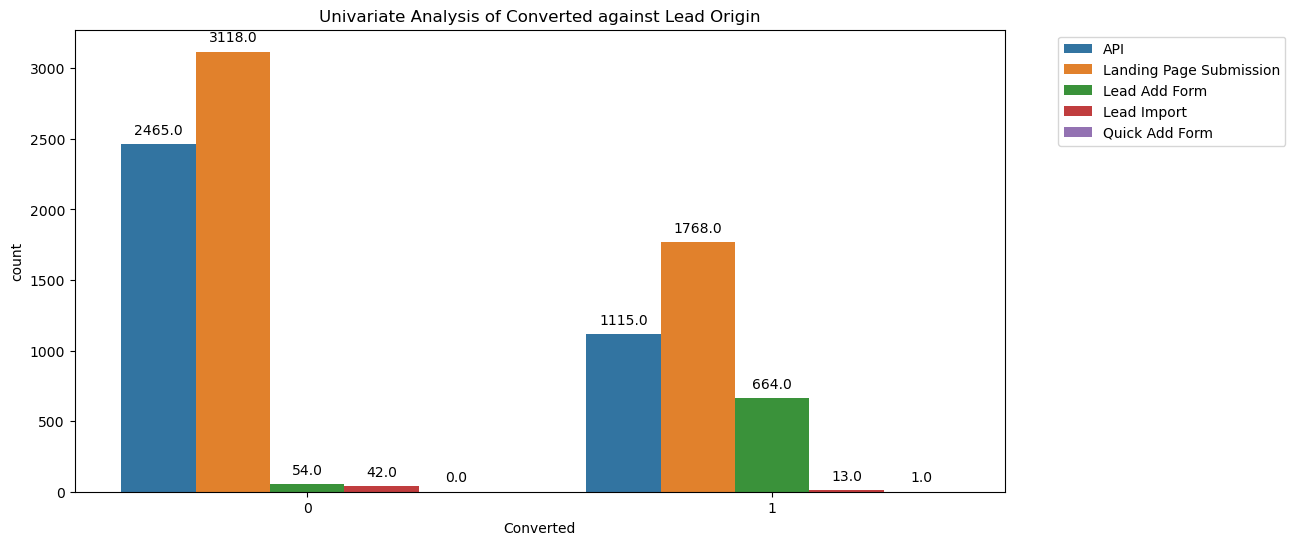

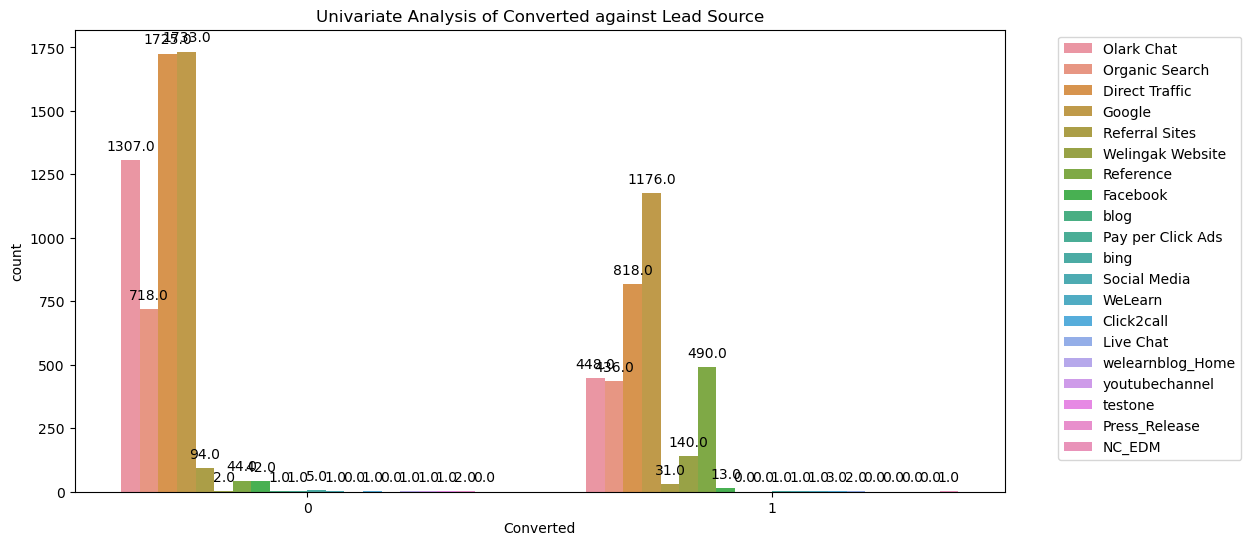

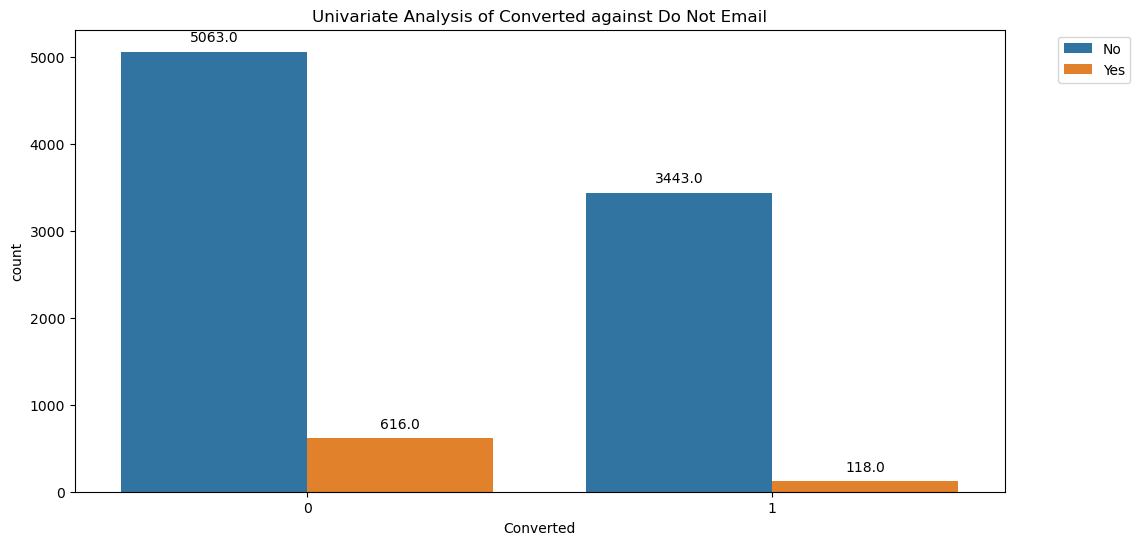

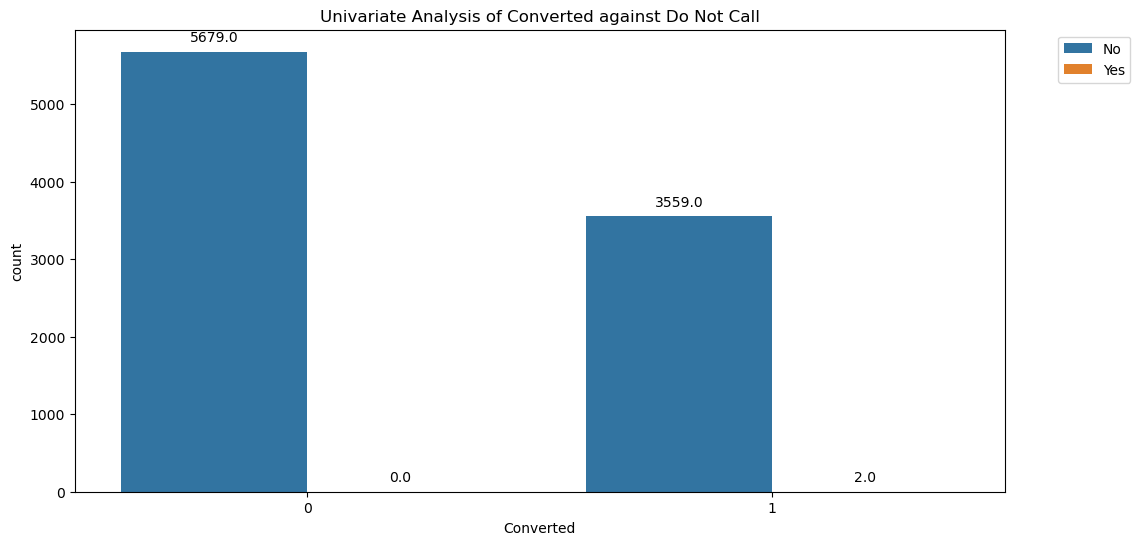

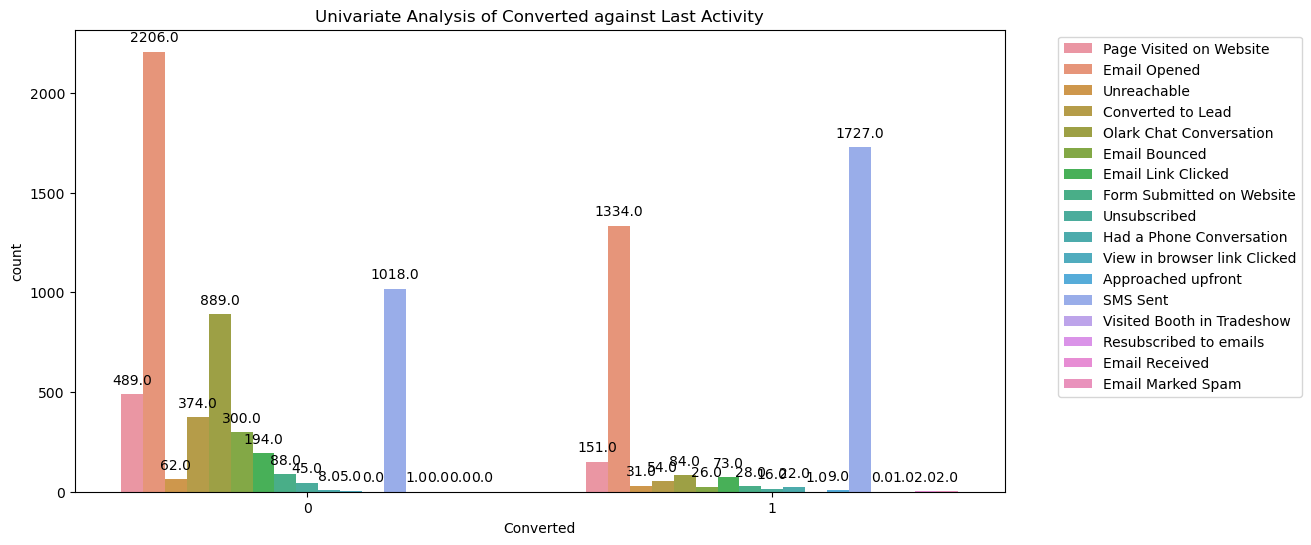

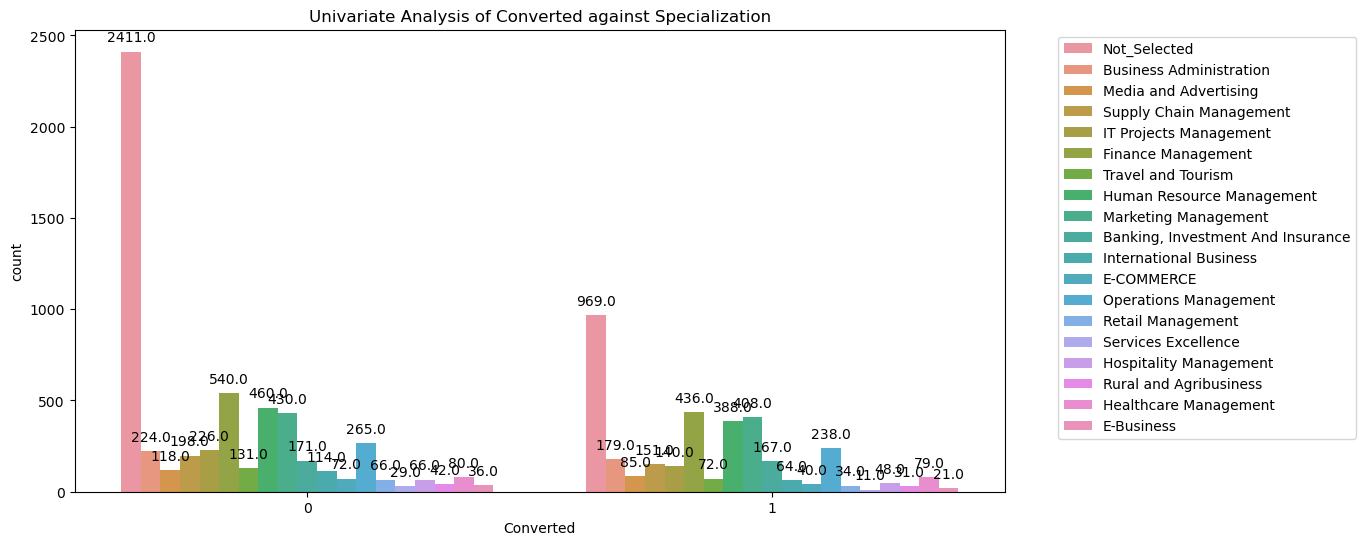

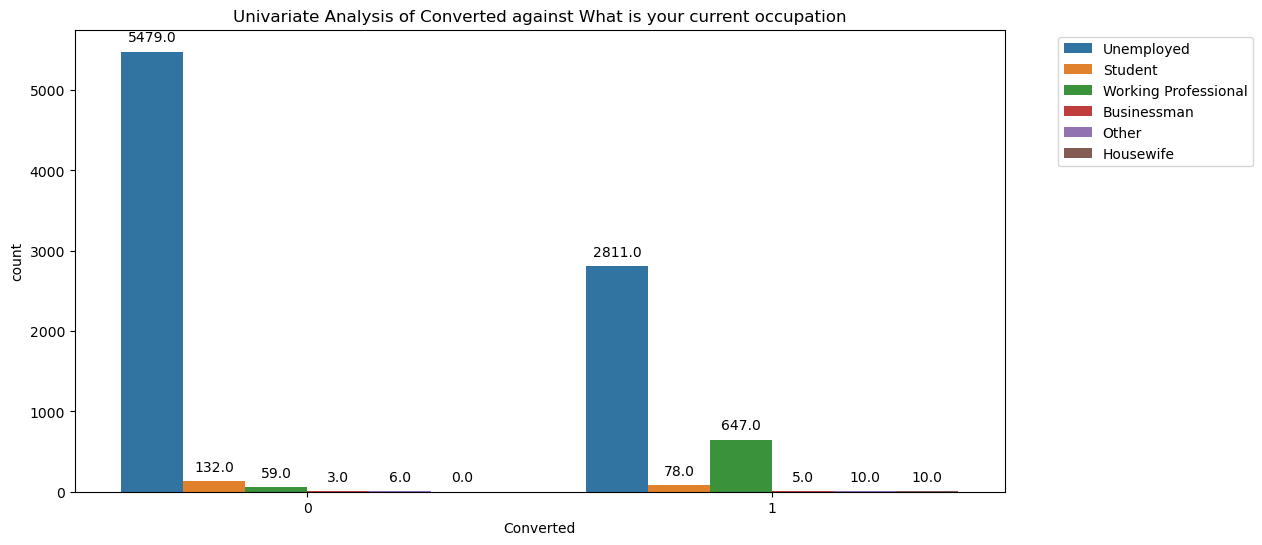

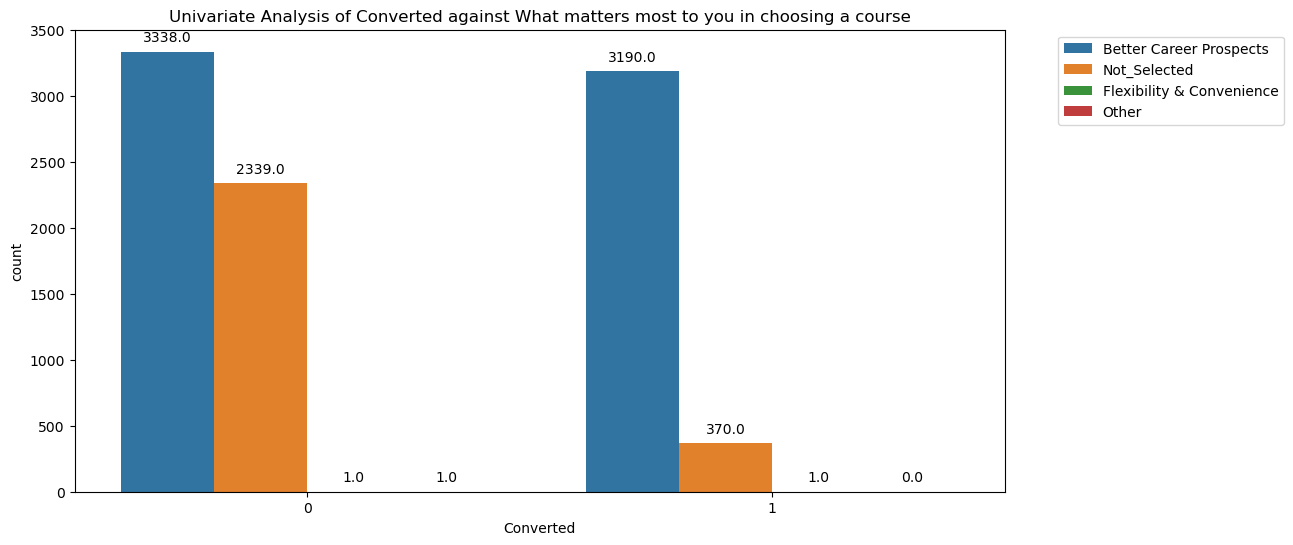

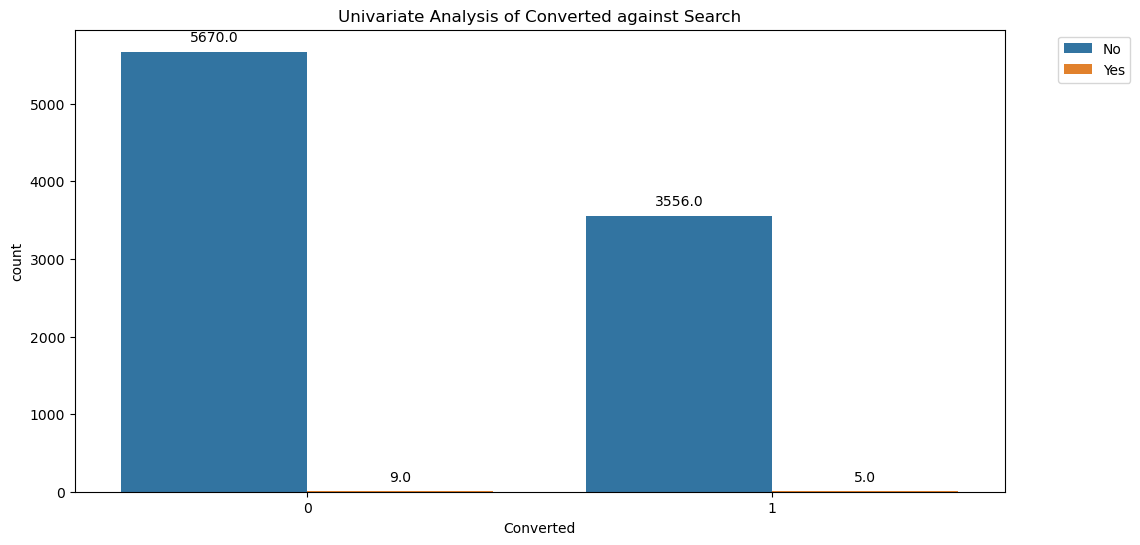

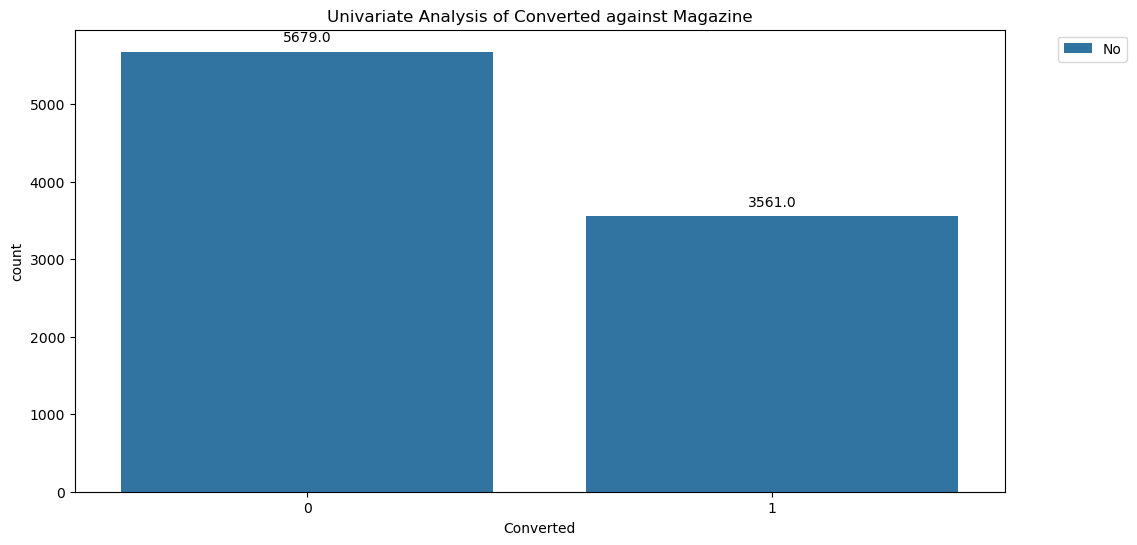

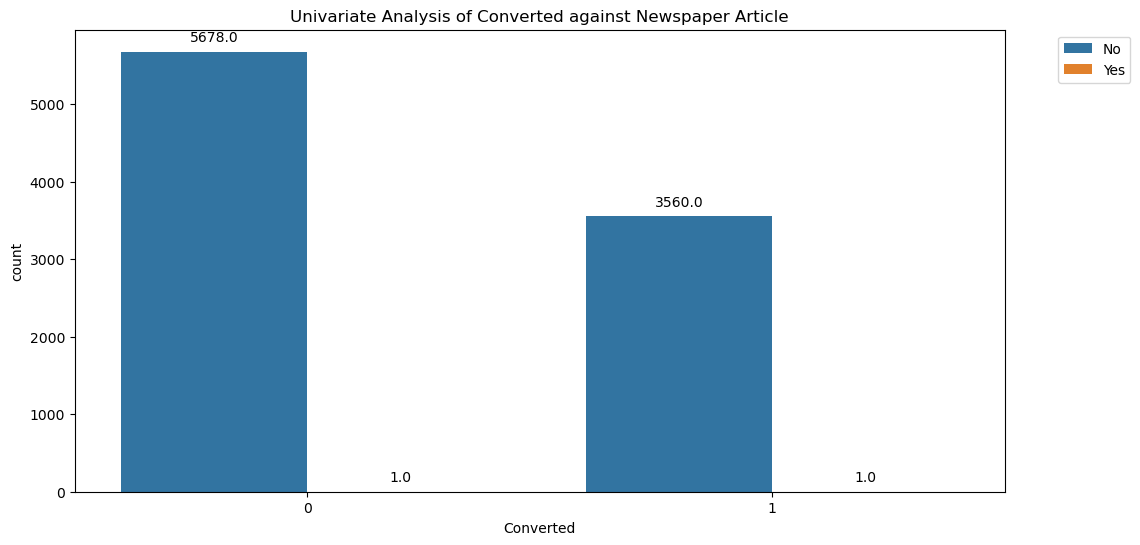

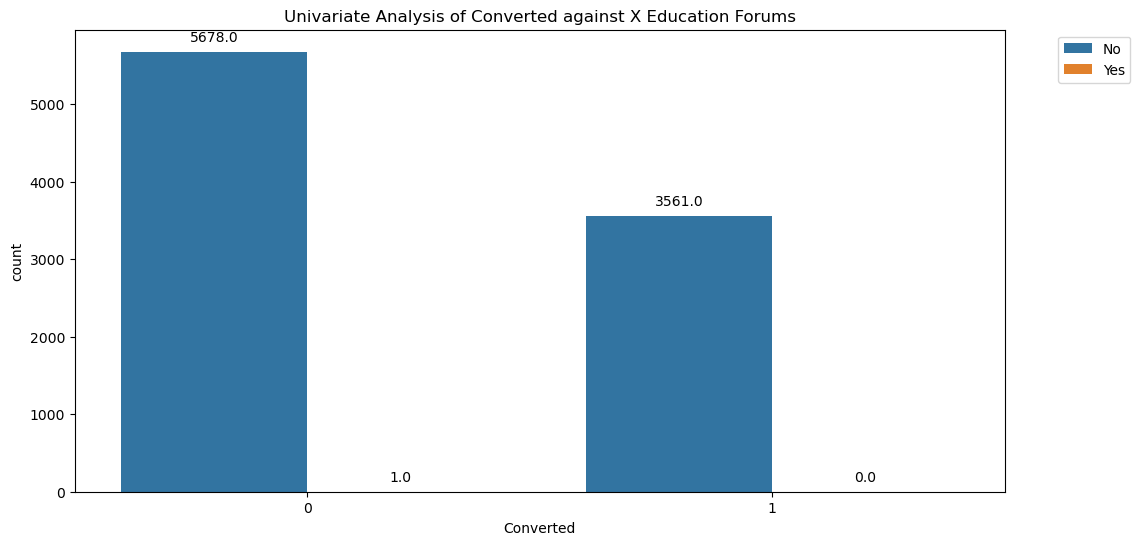

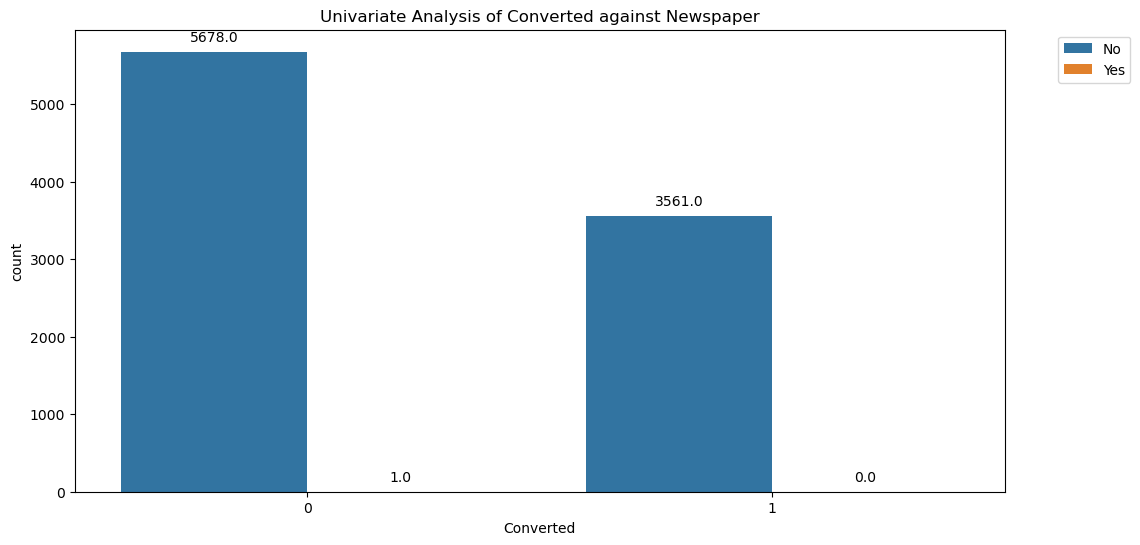

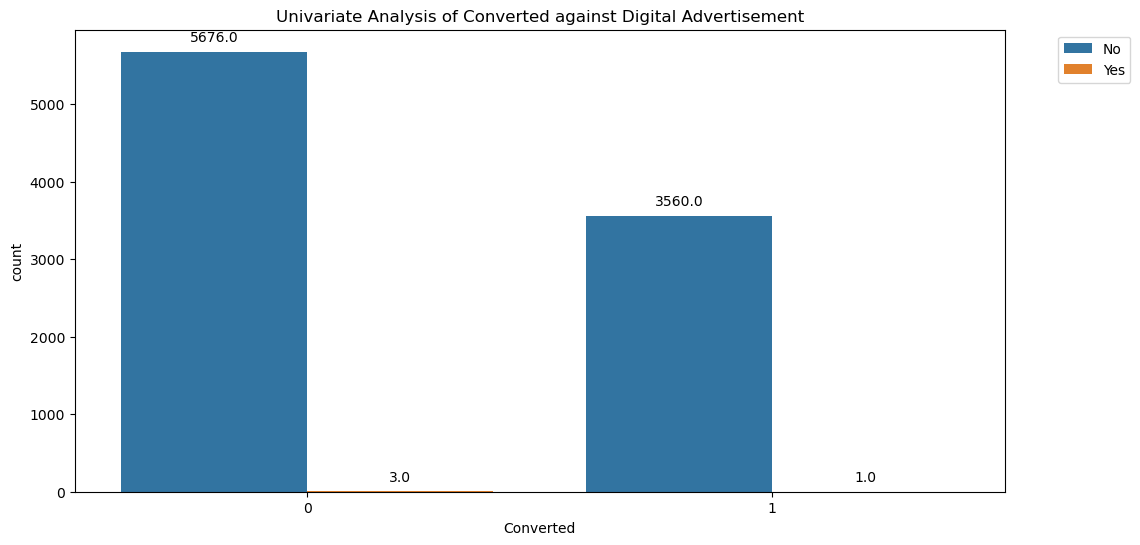

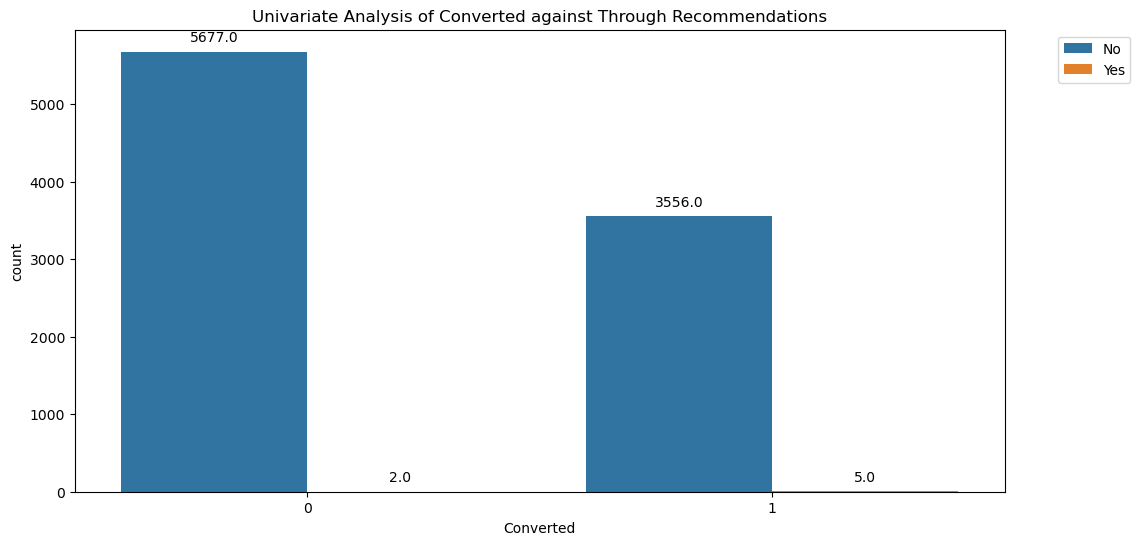

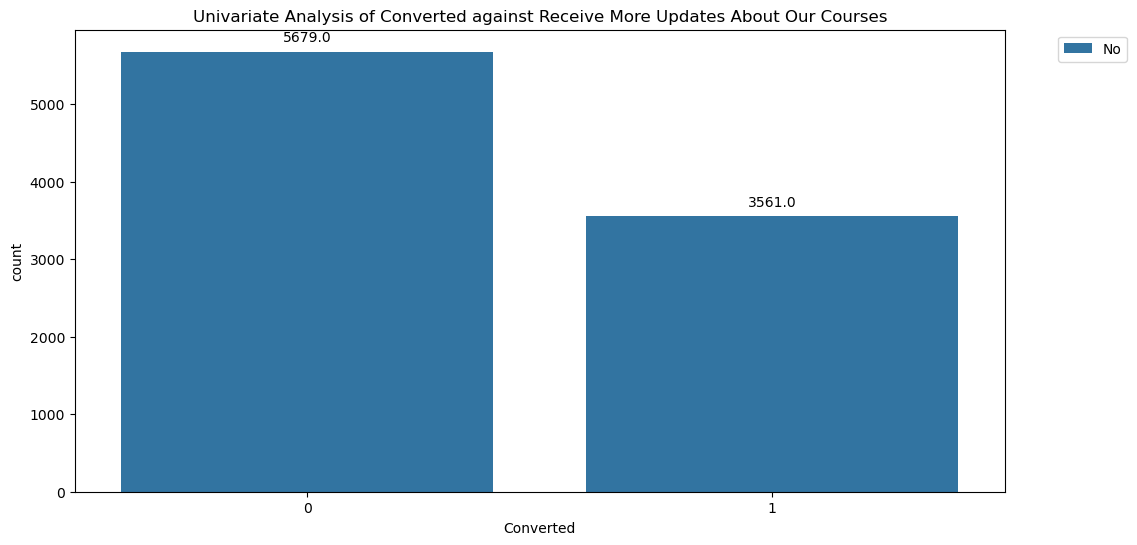

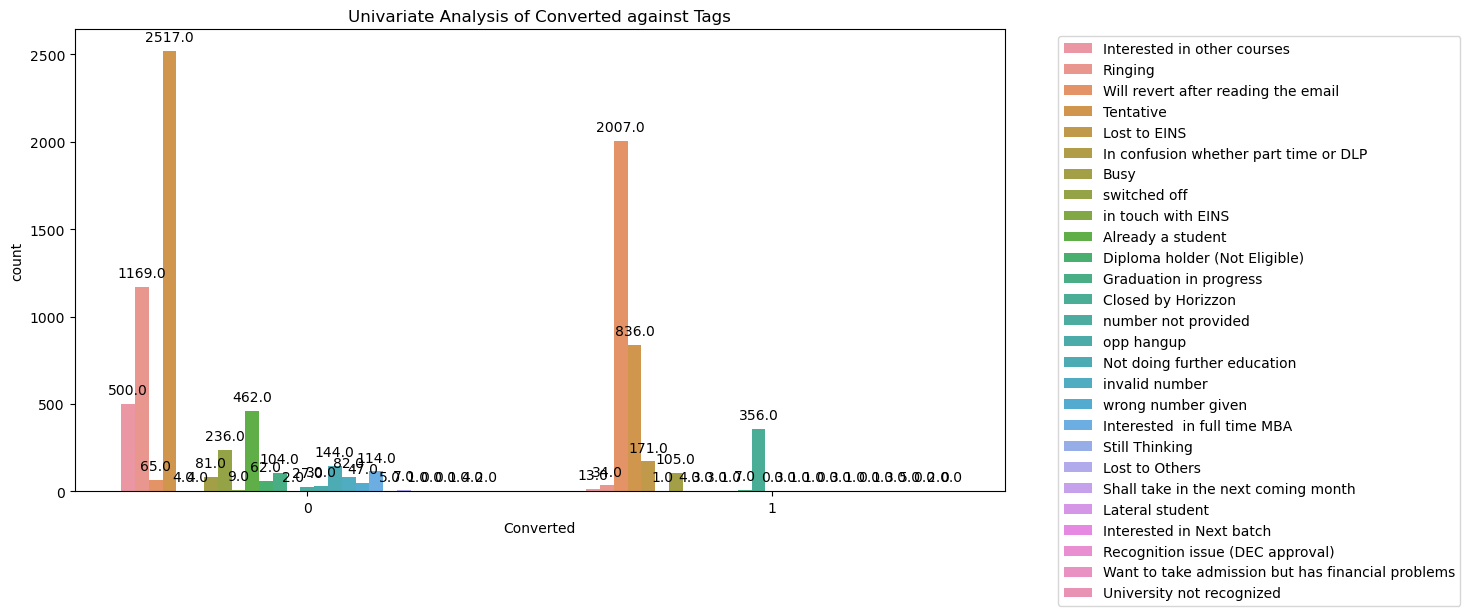

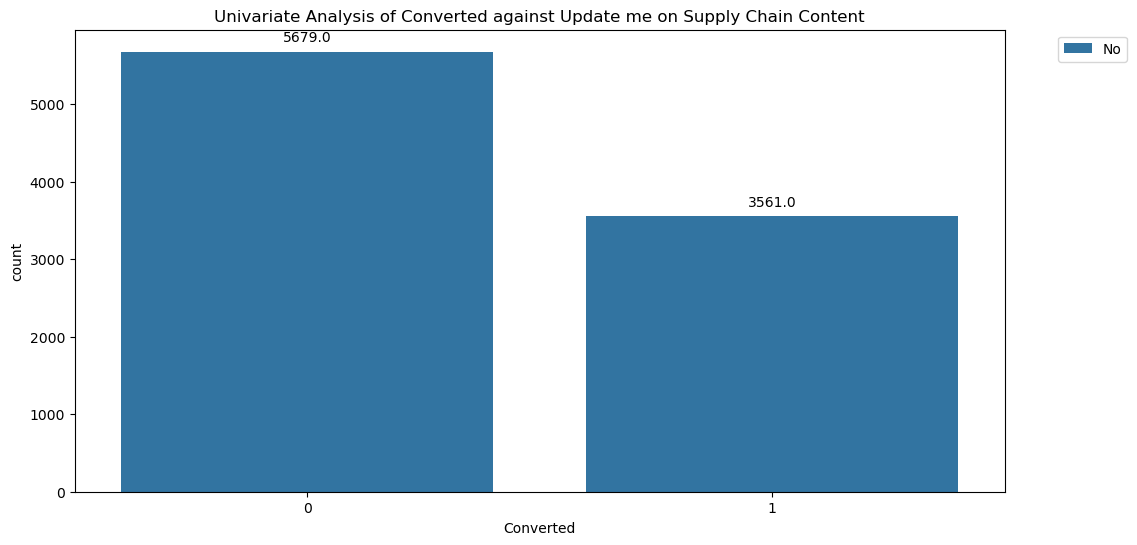

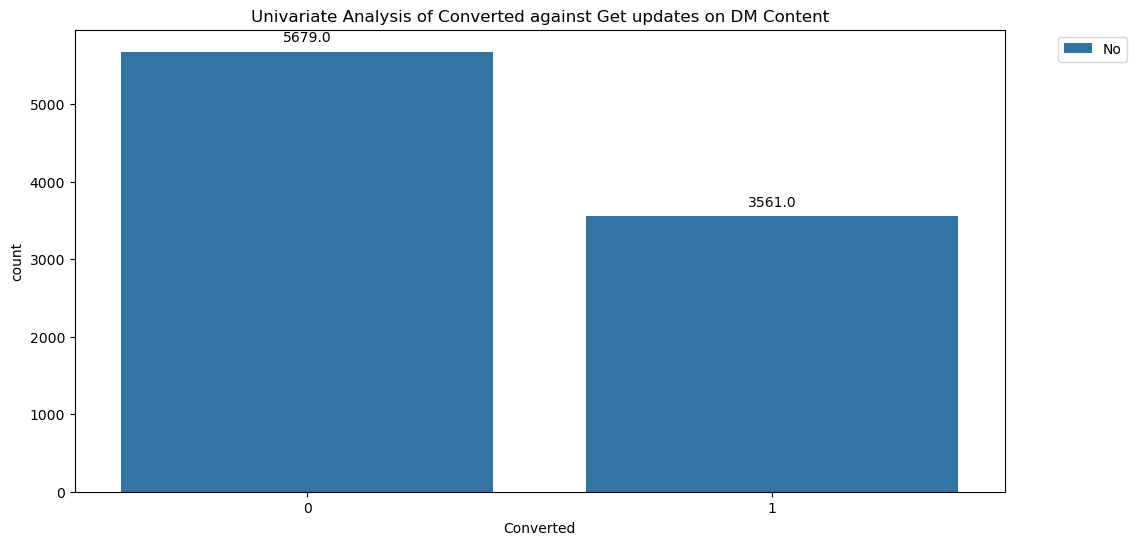

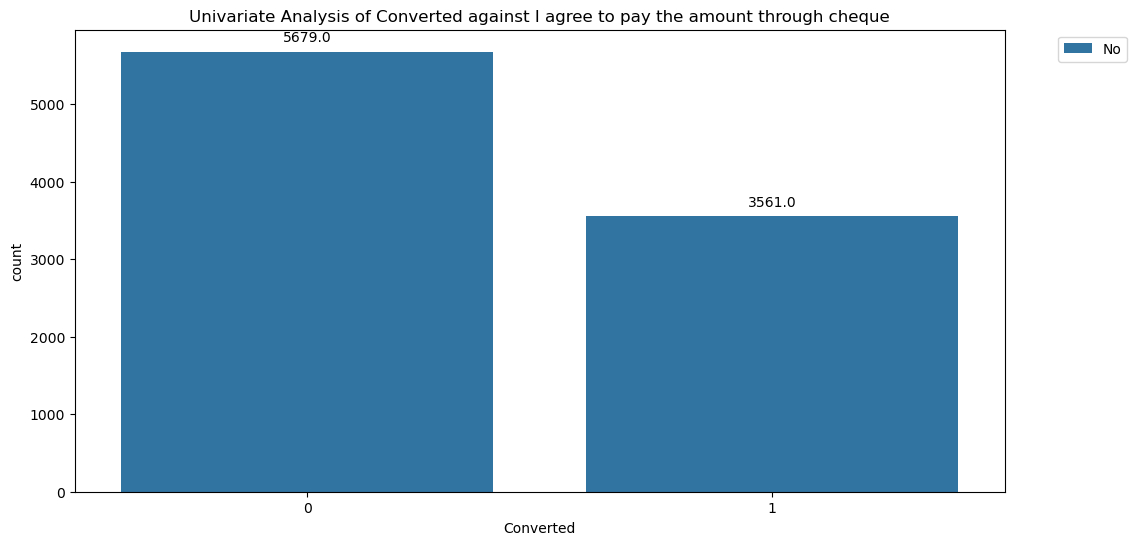

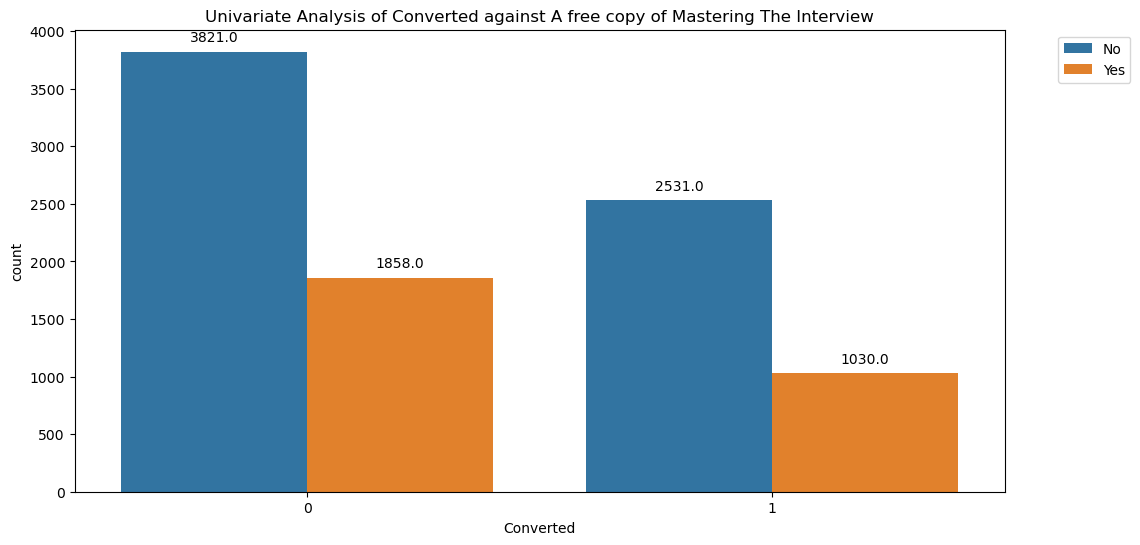

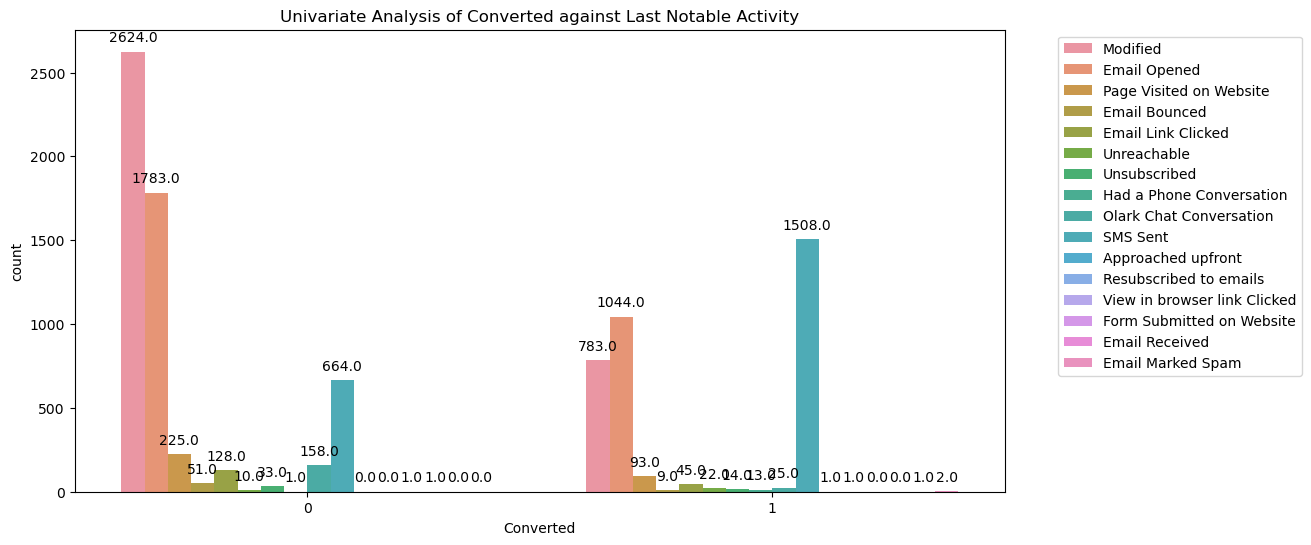

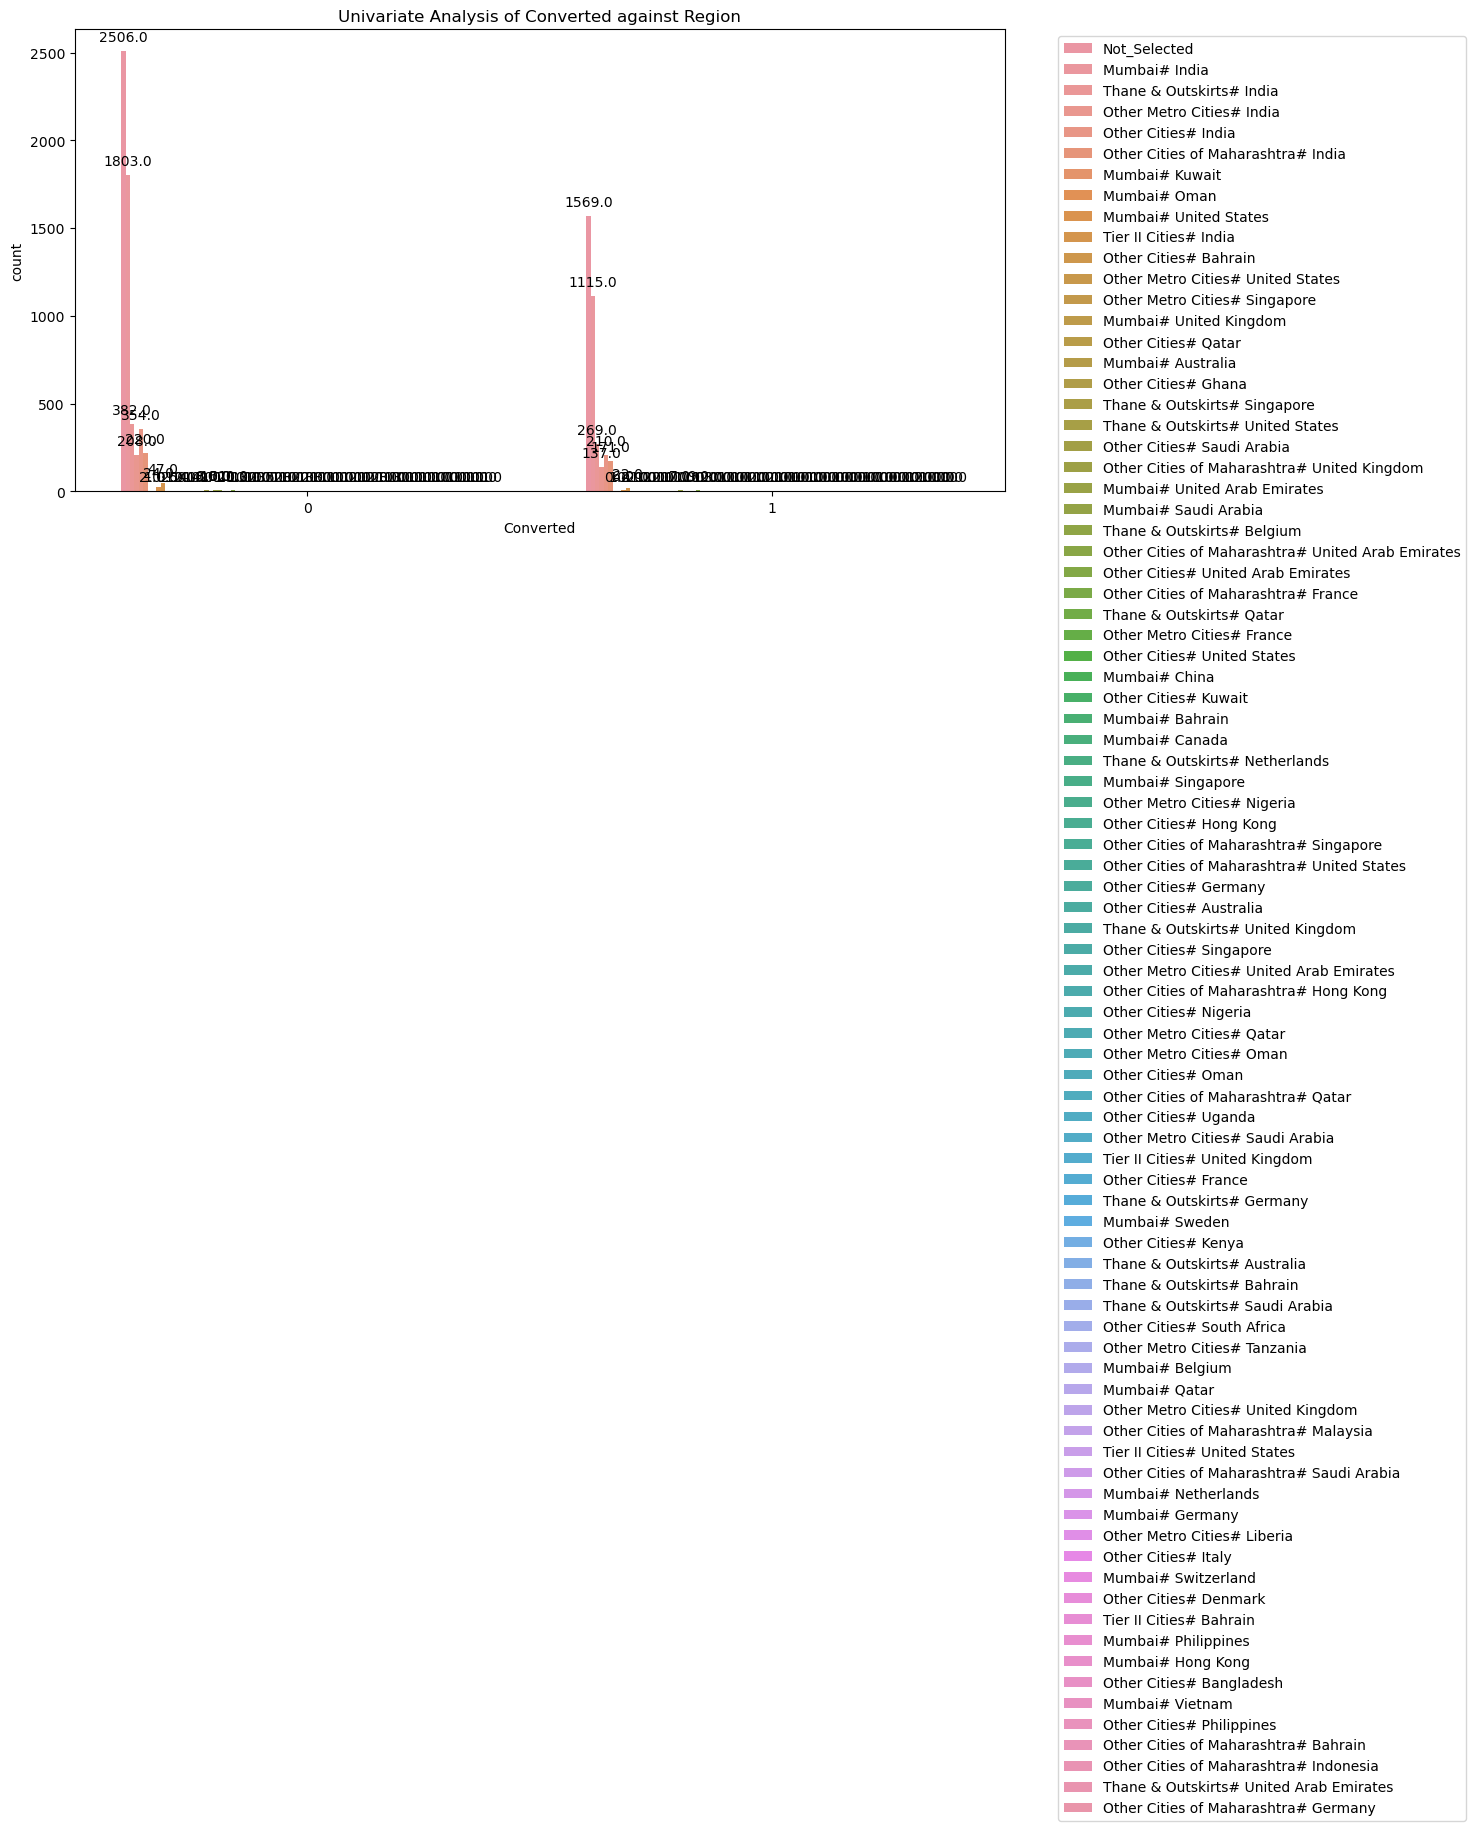

In [30]:
for col in obj_col:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x='Converted', hue=col, data=lead_score)

    # Add count values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title(f'Univariate Analysis of Converted against {col}')

    # Move the legend outside the plot area
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

#### As we can see there are highly skewed datopoints in columns below, Hence dropping them form data set
#### Having same numbers of datapoints hence, Keeping only one column out of these for further model building
#### Reanaming 'Search Column as 'Other_Leads'
'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'

In [31]:
# Columns to drop
drop_col_1 = [
    'Magazine', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper',
    'Digital Advertisement', 'Through Recommendations',
    'Receive More Updates About Our Courses',
    'Update me on Supply Chain Content', 'Get updates on DM Content',
    'I agree to pay the amount through cheque'
]

# Dropping specified columns
lead_score.drop(columns=drop_col_1, axis=1, inplace=True)

# Renaming 'Search' Column to 'Other_leads'
lead_score.rename(columns={'Search': 'Other_Leads'}, inplace=True)

# Dropping 'Propsect ID' & 'Lead Number from Dataset as they will not be useful for model building
drop_col_2 = ['Prospect ID', 'Lead Number']
lead_score.drop(columns=drop_col_2, axis=1, inplace=True)

# Displaying the head of the new DataFrame
print(lead_score.shape)
lead_score.head()

(9240, 16)


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Other_Leads,Tags,A free copy of Mastering The Interview,Last Notable Activity,Region
0,API,Olark Chat,No,0,0,0,0,Page Visited on Website,Not_Selected,Unemployed,Better Career Prospects,No,Interested in other courses,No,Modified,Not_Selected
1,API,Organic Search,No,0,5,674,2,Email Opened,Not_Selected,Unemployed,Better Career Prospects,No,Ringing,No,Email Opened,Not_Selected
2,Landing Page Submission,Direct Traffic,No,1,2,1532,2,Email Opened,Business Administration,Student,Better Career Prospects,No,Will revert after reading the email,Yes,Email Opened,Mumbai# India
3,Landing Page Submission,Direct Traffic,No,0,1,305,1,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,Ringing,No,Modified,Mumbai# India
4,Landing Page Submission,Google,No,1,2,1428,1,Converted to Lead,Not_Selected,Unemployed,Better Career Prospects,No,Will revert after reading the email,No,Modified,Mumbai# India


In [32]:
lead_score.columns

obj_col_new = lead_score.select_dtypes(include="object").columns.tolist()
print(obj_col_new)
print(lead_score.shape)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Other_Leads', 'Tags', 'A free copy of Mastering The Interview', 'Last Notable Activity', 'Region']
(9240, 16)


#### Analysing Numerical Columns

In [33]:
num_col = lead_score.select_dtypes(include=['int64','float64']).columns.tolist()

num_col

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

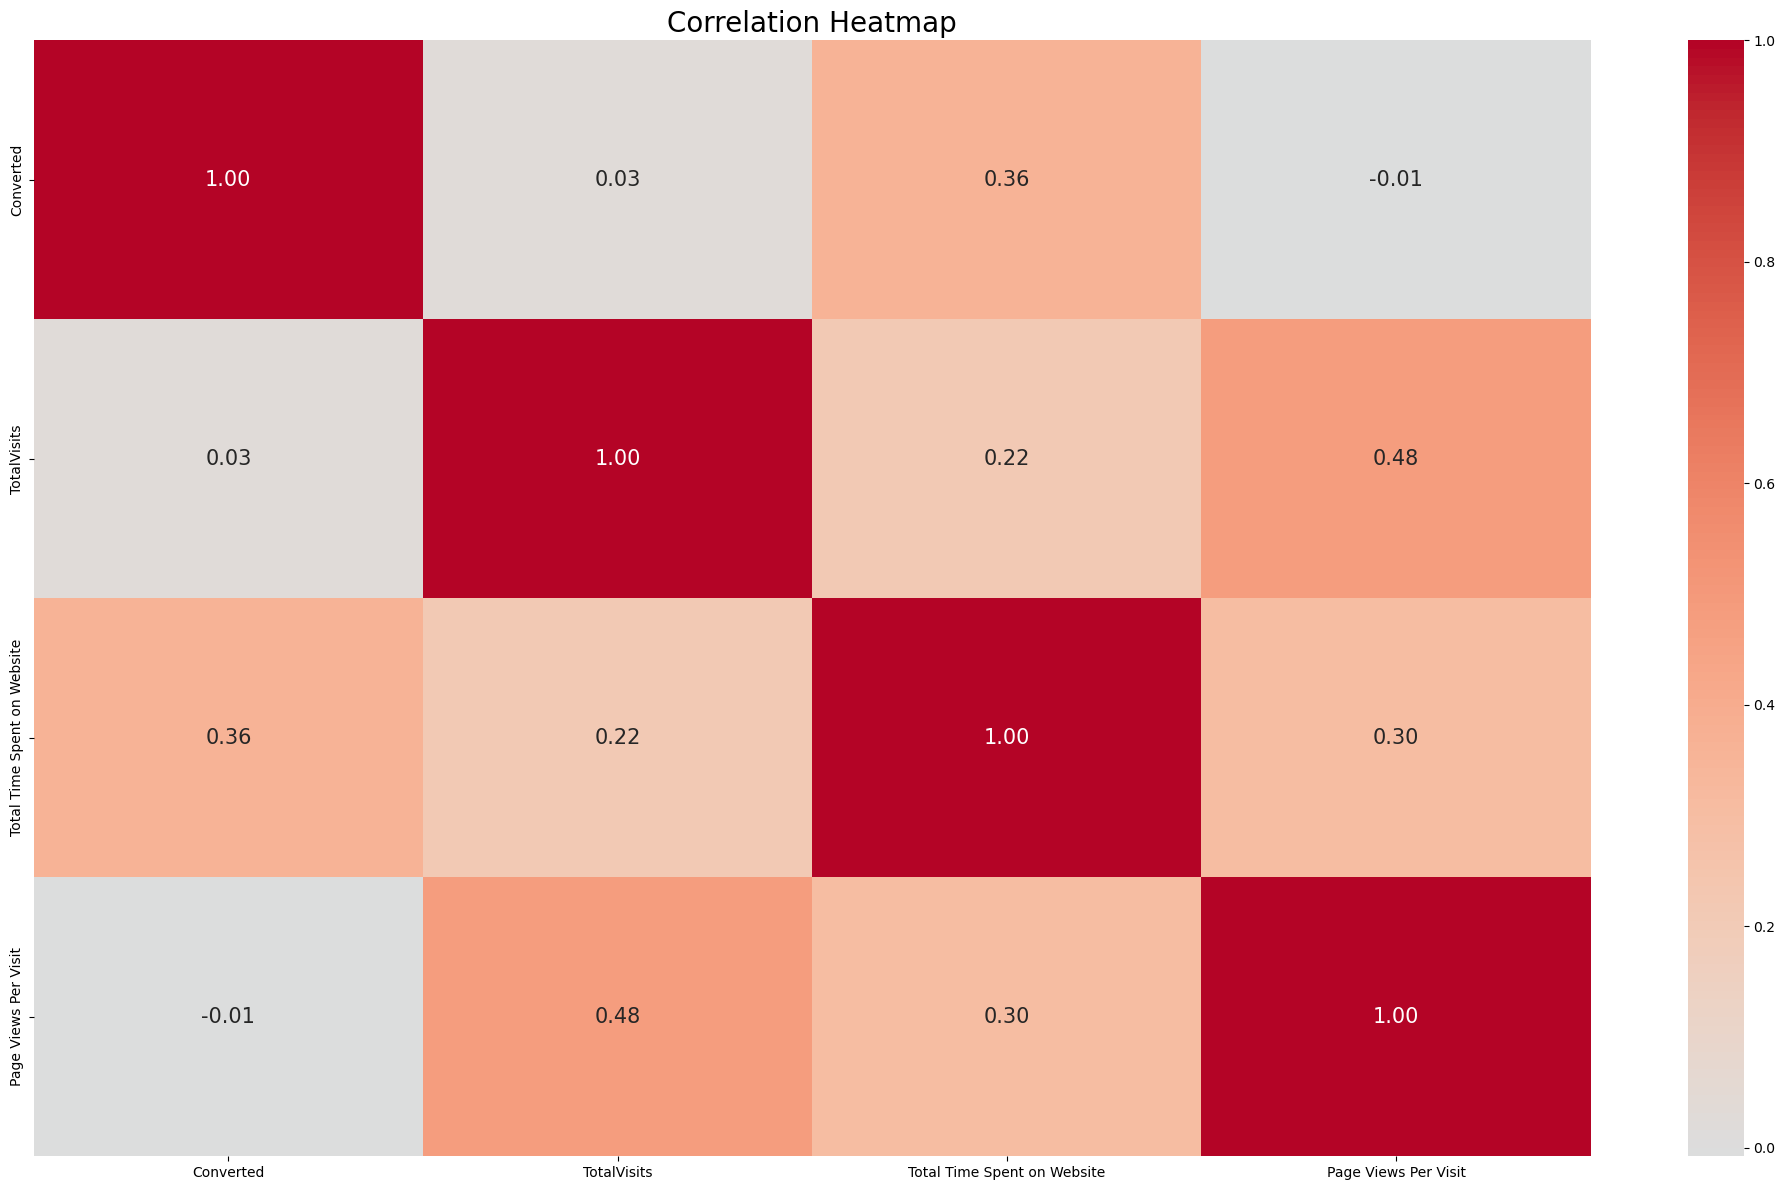

In [34]:
numeric_columns = lead_score.select_dtypes(include='number')


plt.figure(figsize=(20, 12))
heatmap = sns.heatmap(
    numeric_columns.corr(),
    annot=True,
    cmap='coolwarm',
    center=0,
    annot_kws={"size": 15},  # Font size of the annotations
    fmt=".2f",  # Format of the annotations (2 decimal places)
)

# Increase the font size of the title
heatmap.set_title('Correlation Heatmap', fontsize=20)

plt.tight_layout()
plt.show()

#### Checking outliers for the all numerical columns

#### As we can there are few outliers for "Total Visits", "Total Time Spent on Website" & " Page Views Per Visit", lets analyse & treat the outliers

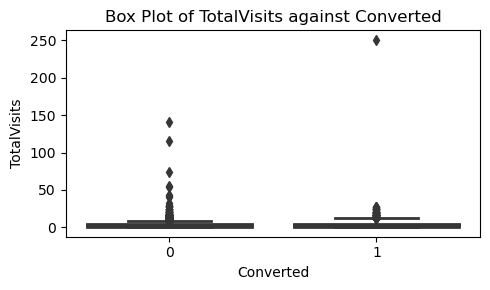

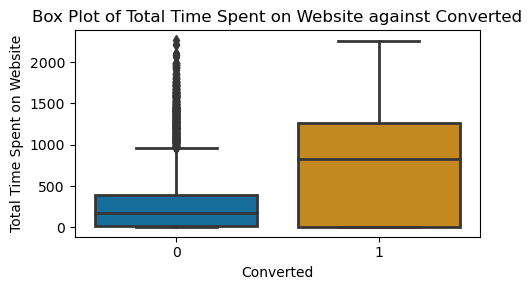

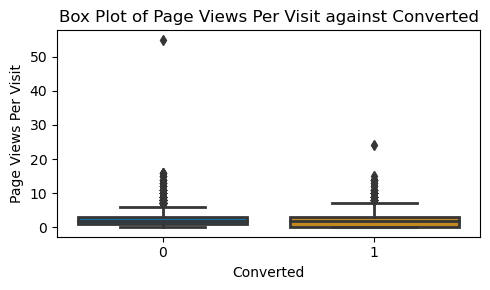

In [35]:
# Assuming 'num_col' contains the numeric columns and 'Converted' is the target column
columns_to_remove = ['Converted']

# Creating a new list excluding the specified columns
num_col = [col for col in num_col if col not in columns_to_remove]

# Now, you can proceed with your box plot code
for col in num_col:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='Converted', y=col, data=lead_score, palette="colorblind", linewidth=2)
    plt.title(f'Box Plot of {col} against Converted')
    plt.xlabel('Converted')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [36]:
numeric = lead_score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.289286
std,4.819024,548.021466,2.150012
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


In [37]:
# Removing data points that are more than 3 standard deviations away from the mean.

numeric = lead_score[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

# Define a function to remove outliers based on Z-score
def remove_outliers_zscore(df, columns, z_threshold=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[(z_scores < z_threshold)]
    return df

# Remove outliers from the specified columns
lead_score_new = remove_outliers_zscore(lead_score, numeric.columns)

# Display the shape of the DataFrame before and after removing outliers
print(f"Original DataFrame shape: {lead_score.shape}")
print(f"DataFrame shape after removing outliers: {lead_score_new.shape}")


Original DataFrame shape: (9240, 16)
DataFrame shape after removing outliers: (9037, 16)


#### Data Prepeation for performing Logistics Regression 

### Checking  the current lead scoring rate = @38%

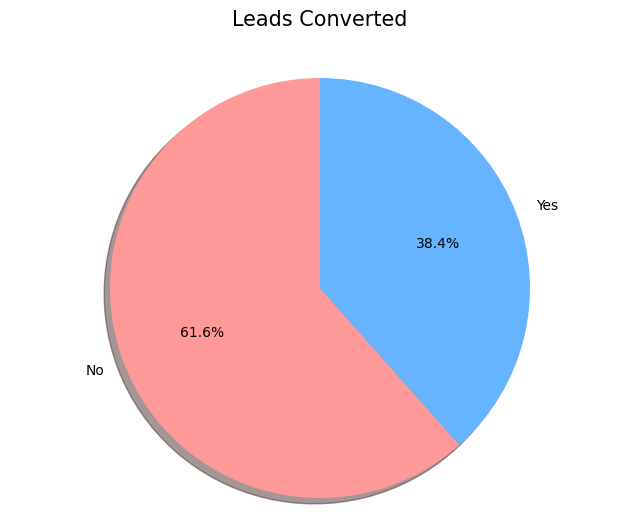

In [38]:
# Assuming 'Converted' column contains binary values (0 or 1)
Conv_counts = lead_score_new['Converted'].value_counts()

# Calculate the percentages
Conv_percentages = (Conv_counts / len(lead_score_new)) * 100

# Change colors and starting angle
colors = ['#ff9999', '#66b3ff']
start_angle = 90  # Change this value to adjust the starting angle

# Use Conv_percentages instead of Converted_percentages
labels = Conv_percentages.index.map({1: 'Yes', 0: 'No'})

plt.figure(figsize=(8, 6))
plt.pie(Conv_percentages, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=start_angle, colors=colors)
plt.title("Leads Converted\n", fontsize=15)
plt.axis('equal')
plt.show()


In [39]:
lead_score_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9037 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9037 non-null   object
 1   Lead Source                                    9037 non-null   object
 2   Do Not Email                                   9037 non-null   object
 3   Converted                                      9037 non-null   int64 
 4   TotalVisits                                    9037 non-null   int64 
 5   Total Time Spent on Website                    9037 non-null   int64 
 6   Page Views Per Visit                           9037 non-null   int64 
 7   Last Activity                                  9037 non-null   object
 8   Specialization                                 9037 non-null   object
 9   What is your current occupation                9037 non-null   

In [40]:
cat_col = lead_score_new.select_dtypes(include="object").columns.tolist()

print(lead_score_new.shape)
cat_col

(9037, 16)


['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Other_Leads',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity',
 'Region']

In [41]:
# Creating dummy variables for categorical columns
cat_col_dummies = pd.get_dummies(lead_score_new[cat_col], drop_first=True)

# # Adding the results to the master dataframe
lead_score_new = pd.concat([lead_score_new, cat_col_dummies], axis=1)

# # Dropping original categorical columns
lead_score_new.drop(cat_col, axis=1, inplace=True)

# print(lead_score_new.shape)
lead_score_new.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,...,Region_Other Cities of Maharashtra# United Kingdom,Region_Other Cities of Maharashtra# United States,Region_Other Cities# Australia,Region_Other Cities# Bahrain,Region_Other Cities# Bangladesh,Region_Other Cities# Denmark,Region_Other Cities# France,Region_Other Cities# Germany,Region_Other Cities# Ghana,Region_Other Cities# Hong Kong,Region_Other Cities# India,Region_Other Cities# Italy,Region_Other Cities# Kenya,Region_Other Cities# Kuwait,Region_Other Cities# Nigeria,Region_Other Cities# Oman,Region_Other Cities# Philippines,Region_Other Cities# Qatar,Region_Other Cities# Saudi Arabia,Region_Other Cities# Singapore,Region_Other Cities# South Africa,Region_Other Cities# Uganda,Region_Other Cities# United Arab Emirates,Region_Other Cities# United States,Region_Other Metro Cities# France,Region_Other Metro Cities# India,Region_Other Metro Cities# Liberia,Region_Other Metro Cities# Nigeria,Region_Other Metro Cities# Oman,Region_Other Metro Cities# Qatar,Region_Other Metro Cities# Saudi Arabia,Region_Other Metro Cities# Singapore,Region_Other Metro Cities# Tanzania,Region_Other Metro Cities# United Arab Emirates,Region_Other Metro Cities# United Kingdom,Region_Other Metro Cities# United States,Region_Thane & Outskirts# Australia,Region_Thane & Outskirts# Bahrain,Region_Thane & Outskirts# Belgium,Region_Thane & Outskirts# Germany,Region_Thane & Outskirts# India,Region_Thane & Outskirts# Qatar,Region_Thane & Outskirts# Saudi Arabia,Region_Thane & Outskirts# Singapore,Region_Thane & Outskirts# United Kingdom,Region_Thane & Outskirts# United States,Region_Tier II Cities# Bahrain,Region_Tier II Cities# India,Region_Tier II Cities# United Kingdom,Region_Tier II Cities# United States
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5,674,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,1532,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,305,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2,1428,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [42]:
num_col_new = lead_score_new.select_dtypes(include=['int64','float64']).columns.tolist()
num_col_new.remove('Converted')
num_col_new

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

### Step 4: Test-Train Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Putting feature variable to X
X = lead_score_new.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,...,Region_Other Cities of Maharashtra# United Kingdom,Region_Other Cities of Maharashtra# United States,Region_Other Cities# Australia,Region_Other Cities# Bahrain,Region_Other Cities# Bangladesh,Region_Other Cities# Denmark,Region_Other Cities# France,Region_Other Cities# Germany,Region_Other Cities# Ghana,Region_Other Cities# Hong Kong,Region_Other Cities# India,Region_Other Cities# Italy,Region_Other Cities# Kenya,Region_Other Cities# Kuwait,Region_Other Cities# Nigeria,Region_Other Cities# Oman,Region_Other Cities# Philippines,Region_Other Cities# Qatar,Region_Other Cities# Saudi Arabia,Region_Other Cities# Singapore,Region_Other Cities# South Africa,Region_Other Cities# Uganda,Region_Other Cities# United Arab Emirates,Region_Other Cities# United States,Region_Other Metro Cities# France,Region_Other Metro Cities# India,Region_Other Metro Cities# Liberia,Region_Other Metro Cities# Nigeria,Region_Other Metro Cities# Oman,Region_Other Metro Cities# Qatar,Region_Other Metro Cities# Saudi Arabia,Region_Other Metro Cities# Singapore,Region_Other Metro Cities# Tanzania,Region_Other Metro Cities# United Arab Emirates,Region_Other Metro Cities# United Kingdom,Region_Other Metro Cities# United States,Region_Thane & Outskirts# Australia,Region_Thane & Outskirts# Bahrain,Region_Thane & Outskirts# Belgium,Region_Thane & Outskirts# Germany,Region_Thane & Outskirts# India,Region_Thane & Outskirts# Qatar,Region_Thane & Outskirts# Saudi Arabia,Region_Thane & Outskirts# Singapore,Region_Thane & Outskirts# United Kingdom,Region_Thane & Outskirts# United States,Region_Tier II Cities# Bahrain,Region_Tier II Cities# India,Region_Tier II Cities# United Kingdom,Region_Tier II Cities# United States
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,674,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1532,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,305,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1428,1,1,0,0,0,0,1,0,0,0,0,0,0,0,

In [45]:
y = lead_score_new['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [46]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [47]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,...,Region_Other Cities of Maharashtra# United Kingdom,Region_Other Cities of Maharashtra# United States,Region_Other Cities# Australia,Region_Other Cities# Bahrain,Region_Other Cities# Bangladesh,Region_Other Cities# Denmark,Region_Other Cities# France,Region_Other Cities# Germany,Region_Other Cities# Ghana,Region_Other Cities# Hong Kong,Region_Other Cities# India,Region_Other Cities# Italy,Region_Other Cities# Kenya,Region_Other Cities# Kuwait,Region_Other Cities# Nigeria,Region_Other Cities# Oman,Region_Other Cities# Philippines,Region_Other Cities# Qatar,Region_Other Cities# Saudi Arabia,Region_Other Cities# Singapore,Region_Other Cities# South Africa,Region_Other Cities# Uganda,Region_Other Cities# United Arab Emirates,Region_Other Cities# United States,Region_Other Metro Cities# France,Region_Other Metro Cities# India,Region_Other Metro Cities# Liberia,Region_Other Metro Cities# Nigeria,Region_Other Metro Cities# Oman,Region_Other Metro Cities# Qatar,Region_Other Metro Cities# Saudi Arabia,Region_Other Metro Cities# Singapore,Region_Other Metro Cities# Tanzania,Region_Other Metro Cities# United Arab Emirates,Region_Other Metro Cities# United Kingdom,Region_Other Metro Cities# United States,Region_Thane & Outskirts# Australia,Region_Thane & Outskirts# Bahrain,Region_Thane & Outskirts# Belgium,Region_Thane & Outskirts# Germany,Region_Thane & Outskirts# India,Region_Thane & Outskirts# Qatar,Region_Thane & Outskirts# Saudi Arabia,Region_Thane & Outskirts# Singapore,Region_Thane & Outskirts# United Kingdom,Region_Thane & Outskirts# United States,Region_Tier II Cities# Bahrain,Region_Tier II Cities# India,Region_Tier II Cities# United Kingdom,Region_Tier II Cities# United States
4958,5,463,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8957,2,183,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8274,4,12,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8909,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9173,1,53,1,1,0,0,1,0,0,0,0

In [48]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,...,Region_Other Cities of Maharashtra# United Kingdom,Region_Other Cities of Maharashtra# United States,Region_Other Cities# Australia,Region_Other Cities# Bahrain,Region_Other Cities# Bangladesh,Region_Other Cities# Denmark,Region_Other Cities# France,Region_Other Cities# Germany,Region_Other Cities# Ghana,Region_Other Cities# Hong Kong,Region_Other Cities# India,Region_Other Cities# Italy,Region_Other Cities# Kenya,Region_Other Cities# Kuwait,Region_Other Cities# Nigeria,Region_Other Cities# Oman,Region_Other Cities# Philippines,Region_Other Cities# Qatar,Region_Other Cities# Saudi Arabia,Region_Other Cities# Singapore,Region_Other Cities# South Africa,Region_Other Cities# Uganda,Region_Other Cities# United Arab Emirates,Region_Other Cities# United States,Region_Other Metro Cities# France,Region_Other Metro Cities# India,Region_Other Metro Cities# Liberia,Region_Other Metro Cities# Nigeria,Region_Other Metro Cities# Oman,Region_Other Metro Cities# Qatar,Region_Other Metro Cities# Saudi Arabia,Region_Other Metro Cities# Singapore,Region_Other Metro Cities# Tanzania,Region_Other Metro Cities# United Arab Emirates,Region_Other Metro Cities# United Kingdom,Region_Other Metro Cities# United States,Region_Thane & Outskirts# Australia,Region_Thane & Outskirts# Bahrain,Region_Thane & Outskirts# Belgium,Region_Thane & Outskirts# Germany,Region_Thane & Outskirts# India,Region_Thane & Outskirts# Qatar,Region_Thane & Outskirts# Saudi Arabia,Region_Thane & Outskirts# Singapore,Region_Thane & Outskirts# United Kingdom,Region_Thane & Outskirts# United States,Region_Tier II Cities# Bahrain,Region_Tier II Cities# India,Region_Tier II Cities# United Kingdom,Region_Tier II Cities# United States
5120,3,995,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3769,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3557,2,74,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6426,5,1252,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
558,1,1295,1,0,0,0,0,0,0,0

In [49]:
y_train.head()

4958    0
8957    0
8274    0
8909    1
9173    0
Name: Converted, dtype: int64

In [50]:
y_test.head()

5120    1
3769    0
3557    0
6426    0
558     0
Name: Converted, dtype: int64

### Step 5: Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

##### Feature Scaling is to be done for the numeric columns (Apart from "dummies" of obj_col)

In [52]:
scaler = StandardScaler()

# Assuming num_col is a list of numeric column names
X_train[num_col] = scaler.fit_transform(X_train[num_col_new])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,...,Region_Other Cities of Maharashtra# United Kingdom,Region_Other Cities of Maharashtra# United States,Region_Other Cities# Australia,Region_Other Cities# Bahrain,Region_Other Cities# Bangladesh,Region_Other Cities# Denmark,Region_Other Cities# France,Region_Other Cities# Germany,Region_Other Cities# Ghana,Region_Other Cities# Hong Kong,Region_Other Cities# India,Region_Other Cities# Italy,Region_Other Cities# Kenya,Region_Other Cities# Kuwait,Region_Other Cities# Nigeria,Region_Other Cities# Oman,Region_Other Cities# Philippines,Region_Other Cities# Qatar,Region_Other Cities# Saudi Arabia,Region_Other Cities# Singapore,Region_Other Cities# South Africa,Region_Other Cities# Uganda,Region_Other Cities# United Arab Emirates,Region_Other Cities# United States,Region_Other Metro Cities# France,Region_Other Metro Cities# India,Region_Other Metro Cities# Liberia,Region_Other Metro Cities# Nigeria,Region_Other Metro Cities# Oman,Region_Other Metro Cities# Qatar,Region_Other Metro Cities# Saudi Arabia,Region_Other Metro Cities# Singapore,Region_Other Metro Cities# Tanzania,Region_Other Metro Cities# United Arab Emirates,Region_Other Metro Cities# United Kingdom,Region_Other Metro Cities# United States,Region_Thane & Outskirts# Australia,Region_Thane & Outskirts# Bahrain,Region_Thane & Outskirts# Belgium,Region_Thane & Outskirts# Germany,Region_Thane & Outskirts# India,Region_Thane & Outskirts# Qatar,Region_Thane & Outskirts# Saudi Arabia,Region_Thane & Outskirts# Singapore,Region_Thane & Outskirts# United Kingdom,Region_Thane & Outskirts# United States,Region_Tier II Cities# Bahrain,Region_Tier II Cities# India,Region_Tier II Cities# United Kingdom,Region_Tier II Cities# United States
4958,0.665513,-0.034860,1.575017,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8957,-0.384904,-0.548908,-0.085221,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8274,0.315374,-0.862844,-0.085221,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8909,-1.085182,-0.884875,-1.192046,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Step 6: Model Building
Let's start by splitting our data into a training set and a test set.

In [53]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,...,Region_Other Cities of Maharashtra# United Kingdom,Region_Other Cities of Maharashtra# United States,Region_Other Cities# Australia,Region_Other Cities# Bahrain,Region_Other Cities# Bangladesh,Region_Other Cities# Denmark,Region_Other Cities# France,Region_Other Cities# Germany,Region_Other Cities# Ghana,Region_Other Cities# Hong Kong,Region_Other Cities# India,Region_Other Cities# Italy,Region_Other Cities# Kenya,Region_Other Cities# Kuwait,Region_Other Cities# Nigeria,Region_Other Cities# Oman,Region_Other Cities# Philippines,Region_Other Cities# Qatar,Region_Other Cities# Saudi Arabia,Region_Other Cities# Singapore,Region_Other Cities# South Africa,Region_Other Cities# Uganda,Region_Other Cities# United Arab Emirates,Region_Other Cities# United States,Region_Other Metro Cities# France,Region_Other Metro Cities# India,Region_Other Metro Cities# Liberia,Region_Other Metro Cities# Nigeria,Region_Other Metro Cities# Oman,Region_Other Metro Cities# Qatar,Region_Other Metro Cities# Saudi Arabia,Region_Other Metro Cities# Singapore,Region_Other Metro Cities# Tanzania,Region_Other Metro Cities# United Arab Emirates,Region_Other Metro Cities# United Kingdom,Region_Other Metro Cities# United States,Region_Thane & Outskirts# Australia,Region_Thane & Outskirts# Bahrain,Region_Thane & Outskirts# Belgium,Region_Thane & Outskirts# Germany,Region_Thane & Outskirts# India,Region_Thane & Outskirts# Qatar,Region_Thane & Outskirts# Saudi Arabia,Region_Thane & Outskirts# Singapore,Region_Thane & Outskirts# United Kingdom,Region_Thane & Outskirts# United States,Region_Tier II Cities# Bahrain,Region_Tier II Cities# India,Region_Tier II Cities# United Kingdom,Region_Tier II Cities# United States
count,6.325000e+03,6.325000e+03,6.325000e+03,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.0,6325.0,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.0,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.0,6325.000000,6325.000000,6325.000000,6325.000000,6325.0,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,...,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.0,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.0000

#### Running First Training Model

In [54]:
import statsmodels.api as sm

In [55]:
# Exclude non-numeric columns
numeric_columns = X_train.select_dtypes(include=['float64', 'uint8']).columns
X_train_numeric = X_train[numeric_columns]

# Convert the dependent variable to numeric type
y_train = pd.to_numeric(y_train)

# Fit the GLM model
logreg = sm.GLM(y_train, sm.add_constant(X_train_numeric), family=sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6325
Model:                            GLM   Df Residuals:                     6151
Model Family:                Binomial   Df Model:                          173
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 26 Nov 2023   Deviance:                       71288.
Time:                        19:45:38   Pearson chi2:                 3.49e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                     5.06e+15   6.31e+07   8.02e+07      0.000    5.06e+15    5.06e+15
TotalVisits                                                              9.321e+13   1.29e+06   7.24e+07      0.000    9.32e+13    9.32e+13
Total Time Spent on Website                                              3.938e+14   1.04e+06   3.79e+08      0.000    3.94e+14    3.94e+14
Page Views Per Visit                                                    -1.379e+14   1.38e+06     -1e+08      0.000   -1.38e+14   -1.38e+14
Lead Origin_Landing Page Submission                                     -6.637e+13   4.07e+06  -1.63e+07      0.000   -6.64e+13   -6.64e+13
Lead Origin_Lead Add Form                                                6.673e+13    1.3e+07   5.15e+06      0.000    6.67e+13    6.67e+13
Lead Origin_Lead Import                                                 -3.012e+13   2.99e+07  -1.01e+06      0.000   -3.01e+13   -3.01e+13
Lead Source_Direct Traffic                                              -3.268e+15   4.27e+07  -7.65e+07      0.000   -3.27e+15   -3.27e+15
Lead Source_Facebook                                                    -3.494e+15   3.83e+07  -9.13e+07      0.000   -3.49e+15   -3.49e+15
Lead Source_Google                                                      -3.272e+15   4.26e+07  -7.68e+07      0.000   -3.27e+15   -3.27e+15
Lead Source_Live Chat                                                    9.447e+14   6.26e+07   1.51e+07      0.000    9.45e+14    9.45e+14
Lead Source_NC_EDM                                                       2.081e+14   7.95e+07   2.62e+06      0.000    2.08e+14    2.08e+14
Lead Source_Olark Chat                                                  -2.958e+15   4.28e+07  -6.91e+07      0.000   -2.96e+15   -2.96e+15
Lead Source_Organic Search                                              -3.316e+15   4.28e+07  -7.76e+07      0.000   -3.32e+15   -3.32e+15
Lead Source_Pay per Click Ads                                              12.5022   6.89e-07   1.82e+07      0.000      12.502      12.502
Lead Source_Press_Release                                                 -19.0820   4.82e-07  -3.96e+07      0.000     -19.082     -19.082
Lead Source_Reference                                                   -3.372e+15   4.08e+07  -8.26e+07      0.000   -3.37e+15   -3.37e+15
Lead Source_Referral Sites                                              -3.327e+15   4.34e+07  -7.67e+07      0.000   -3.33e+15   -3.33e+15
Lead Source_Social Media                                                -2.373e+15    6.4e+07   -3.7e+07      0.000   -2.37e+15   -2.37e+15
Lea

### Step 8: Feature Selection Using RFE

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression class
logreg = LogisticRegression()

# Create an instance of the RFE class
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the RFE model
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = rfe.support_

# Print the selected features
print(selected_features)


[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False  True  True False
 False False False False False False  True False  True False  True False
 False  True False False  True False  True False False  True  True False
 False False False False False False False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 75),
 ('Total Time Spent on Website', False, 9),
 ('Page Views Per Visit', False, 69),
 ('Lead Origin_Landing Page Submission', False, 39),
 ('Lead Origin_Lead Add Form', False, 8),
 ('Lead Origin_Lead Import', False, 78),
 ('Lead Source_Direct Traffic', False, 62),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 64),
 ('Lead Source_Live Chat', False, 149),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', False, 63),
 ('Lead Source_Pay per Click Ads', False, 179),
 ('Lead Source_Press_Release', False, 178),
 ('Lead Source_Reference', False, 61),
 ('Lead Source_Referral Sites', False, 60),
 ('Lead Source_Social Media', False, 106),
 ('Lead Source_WeLearn', False, 142),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 132),
 ('Lead Source_blog', False, 83),
 ('Lead Source_testone', False, 172),
 ('Lead Source_welearnblog_Home', False, 91),
 ('Lead Source_youtube

In [58]:
col = X_train.columns[rfe.support_]
print(len(col))
col

15


Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_Not_Selected',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Tentative',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       ...
       'Region_Thane & Outskirts# India', 'Region_Thane & Outskirts# Qatar',
       'Region_Thane & Outskirts# Saudi Arabia',
       'Region_Thane & Outskirts# Singapore',
       'Region_Thane & Outskirts# United Kingdom',
       'Region_Thane & Outskirts# United States',
       'Region_Tier II Cities# Bahrain', 'Region_Tier II Cities# India',
       'Region_Tier II Cities# United Kingdom',
       'Region_Tier II Cities# United States'],
      dtype='object', length=178)

#### Post performing Recursive Feature Elimination, Building Logistic Regression Model
### Model-1

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6325
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1227.9
Date:                Sun, 26 Nov 2023   Deviance:                       2455.8
Time:                        19:45:47   Pearson chi2:                 1.20e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6112
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.9981      0.196    -15.287      0.000      -3.383      -2.614
Lead Source_Welingak Website                                   2.7675      0.753      3.676      0.000       1.292       4.243
Last Activity_SMS Sent                                         2.0721      0.121     17.090      0.000       1.834       2.310
What matters most to you in choosing a course_Not_Selected    -2.6183      0.146    -17.889      0.000      -2.905      -2.331
Tags_Busy                                                      2.4824      0.283      8.772      0.000       1.928       3.037
Tags_Closed by Horizzon                                        8.9140      0.741     12.026      0.000       7.461      10.367
Tags_Lost to EINS                                              9.5897      0.770     12.446      0.000       8.080      11.100
Tags_Not doing further education                             -22.0213   2.04e+04     -0.001      0.999      -4e+04       4e+04
Tags_Ringing                                                  -1.6250      0.295     -5.501      0.000      -2.204      -1.046
Tags_Tentative                                                 3.5748      0.225     15.913      0.000       3.135       4.015
Tags_Will revert after reading the email                       6.6164      0.260     25.424      0.000       6.106       7.126
Tags_invalid number                                          -23.4287   2.68e+04     -0.001      0.999   -5.26e+04    5.25e+04
Tags_switched off                                             -2.2076      0.623     -3.544      0.000      -3.429      -0.987
Tags_wrong number given                                      -23.6730   3.77e+04     -0.001      0.999    -7.4e+04     7.4e+04
Last Notable Activity_Modified                                -1.6250      0.126    -12.848      0.000      -1.873      -1.377
Last Notable Activity_Olark Chat Conversation                 -1.6406      0.431     -3.807      0.000      -2.485      -0.796
==============================================================================================================================
"""

#### As we see 'Tags_wrong number given' having 'p'value more than 0.05, & having colinearity with 'Tags_invalid number', hence removing the same from training data set

In [61]:
col = col.drop('Tags_wrong number given')
print(len(col))
print(col)

14
Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_Not_Selected',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Tentative',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')


#### Rebuilding model post dropping 'Tags_wrong number given'
### Model-2

In [62]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6325
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1231.8
Date:                Sun, 26 Nov 2023   Deviance:                       2463.7
Time:                        19:45:47   Pearson chi2:                 1.17e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6107
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -3.1173      0.197    -15.799      0.000      -3.504      -2.731
Lead Source_Welingak Website                                   2.7632      0.752      3.673      0.000       1.289       4.237
Last Activity_SMS Sent                                         2.0433      0.120     16.987      0.000       1.808       2.279
What matters most to you in choosing a course_Not_Selected    -2.6102      0.146    -17.901      0.000      -2.896      -2.324
Tags_Busy                                                      2.6141      0.282      9.269      0.000       2.061       3.167
Tags_Closed by Horizzon                                        9.0211      0.742     12.159      0.000       7.567      10.475
Tags_Lost to EINS                                              9.6913      0.771     12.569      0.000       8.180      11.203
Tags_Not doing further education                             -21.8992   2.04e+04     -0.001      0.999   -4.01e+04       4e+04
Tags_Ringing                                                  -1.4829      0.294     -5.050      0.000      -2.058      -0.907
Tags_Tentative                                                 3.6953      0.225     16.399      0.000       3.254       4.137
Tags_Will revert after reading the email                       6.7310      0.261     25.747      0.000       6.219       7.243
Tags_invalid number                                          -23.2895   2.69e+04     -0.001      0.999   -5.27e+04    5.26e+04
Tags_switched off                                             -2.0637      0.622     -3.318      0.001      -3.283      -0.845
Last Notable Activity_Modified                                -1.6106      0.126    -12.751      0.000      -1.858      -1.363
Last Notable Activity_Olark Chat Conversation                 -1.6401      0.431     -3.807      0.000      -2.485      -0.796
==============================================================================================================================
"""

In [63]:
col = col.drop('Tags_invalid number')
print(len(col))
print(col)

13
Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_Not_Selected',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Tentative',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')


#### Building Model again
### Model-3

In [64]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6325
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1237.2
Date:                Sun, 26 Nov 2023   Deviance:                       2474.4
Time:                        19:45:47   Pearson chi2:                 1.16e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6100
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -3.2840      0.198    -16.572      0.000      -3.672      -2.896
Lead Source_Welingak Website                                   2.7578      0.751      3.670      0.000       1.285       4.231
Last Activity_SMS Sent                                         2.0146      0.119     16.867      0.000       1.780       2.249
What matters most to you in choosing a course_Not_Selected    -2.6023      0.145    -17.916      0.000      -2.887      -2.318
Tags_Busy                                                      2.7926      0.281      9.944      0.000       2.242       3.343
Tags_Closed by Horizzon                                        9.1721      0.743     12.350      0.000       7.716      10.628
Tags_Lost to EINS                                              9.8373      0.772     12.748      0.000       8.325      11.350
Tags_Not doing further education                             -20.7315   1.24e+04     -0.002      0.999   -2.43e+04    2.43e+04
Tags_Ringing                                                  -1.2937      0.292     -4.436      0.000      -1.865      -0.722
Tags_Tentative                                                 3.8623      0.226     17.103      0.000       3.420       4.305
Tags_Will revert after reading the email                       6.8911      0.263     26.245      0.000       6.376       7.406
Tags_switched off                                             -1.8727      0.621     -3.016      0.003      -3.090      -0.656
Last Notable Activity_Modified                                -1.5923      0.126    -12.613      0.000      -1.840      -1.345
Last Notable Activity_Olark Chat Conversation                 -1.6390      0.431     -3.806      0.000      -2.483      -0.795
==============================================================================================================================
"""

In [65]:
col = col.drop('Tags_Not doing further education')
print(len(col))
print(col)

12
Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_Not_Selected',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Tentative',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')


#### Building Model again
### Model-4

In [66]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6325
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1239.4
Date:                Sun, 26 Nov 2023   Deviance:                       2478.9
Time:                        19:45:47   Pearson chi2:                 1.17e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6098
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -3.3615      0.197    -17.031      0.000      -3.748      -2.975
Lead Source_Welingak Website                                   2.7589      0.752      3.671      0.000       1.286       4.232
Last Activity_SMS Sent                                         2.0180      0.119     16.892      0.000       1.784       2.252
What matters most to you in choosing a course_Not_Selected    -2.6032      0.145    -17.913      0.000      -2.888      -2.318
Tags_Busy                                                      2.8690      0.280     10.232      0.000       2.319       3.419
Tags_Closed by Horizzon                                        9.2526      0.742     12.463      0.000       7.798      10.708
Tags_Lost to EINS                                              9.9182      0.771     12.857      0.000       8.406      11.430
Tags_Ringing                                                  -1.2187      0.291     -4.185      0.000      -1.790      -0.648
Tags_Tentative                                                 3.9400      0.225     17.501      0.000       3.499       4.381
Tags_Will revert after reading the email                       6.9701      0.262     26.617      0.000       6.457       7.483
Tags_switched off                                             -1.7979      0.621     -2.897      0.004      -3.014      -0.581
Last Notable Activity_Modified                                -1.5958      0.126    -12.645      0.000      -1.843      -1.348
Last Notable Activity_Olark Chat Conversation                 -1.6373      0.431     -3.800      0.000      -2.482      -0.793
==============================================================================================================================
"""

In [67]:
# Import the VIF function
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

# Print or display the VIF dataframe
display(vif)

,Features,VIF
0,Lead Source_Welingak Website,1.13
4,Tags_Closed by Horizzon,1.07
5,Tags_Lost to EINS,1.06
11,Last Notable Activity_Olark Chat Conversation,1.05
3,Tags_Busy,1.04
9,Tags_switched off,1.03
2,What matters most to you in choosing a course_...,0.26
8,Tags_Will revert after reading the email,0.12
7,Tags_Tentative,0.11
1,Last Activity_SMS Sent,0.09


##### "After building the logistic regression model with significant features and low multicollinearity, the next step is to predict outcomes on the training data. This allows us to evaluate the model's performance and its ability to generalize to the data it was trained on."

In [68]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4958    0.010148
8957    0.821339
8274    0.006983
8909    0.116637
9173    0.026073
6866    0.071606
5497    0.026073
5780    0.006983
4719    0.640719
7937    0.640719
dtype: float64

### Model Prediction

In [69]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01014811, 0.82133885, 0.00698271, 0.11663683, 0.02607261,
       0.0716059 , 0.02607261, 0.00698271, 0.64071942, 0.64071942])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [70]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.010148,4958
1,0,0.821339,8957
2,0,0.006983,8274
3,1,0.116637,8909
4,0,0.026073,9173


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [71]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.010148,4958,0
1,0,0.821339,8957,1
2,0,0.006983,8274,0
3,1,0.116637,8909,0
4,0,0.026073,9173,0


In [72]:
from sklearn import metrics

In [73]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3749  141]
 [ 343 2092]]


In [74]:
# Predicted     not_Converted    Converted
# Actual
# not_Converted        3749      141
# Converted            343       2092  

In [75]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9234782608695652


## Metrics beyond simply accuracy

In [76]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [77]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8591375770020534

In [78]:
# Let us calculate specificity
TN / float(TN+FP)

0.9637532133676092

In [79]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03624678663239075


In [80]:
# positive predictive value 
print (TP / float(TP+FP))

0.9368562472010747


In [81]:
# Negative predictive value
print (TN / float(TN+ FN))

0.916177908113392


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

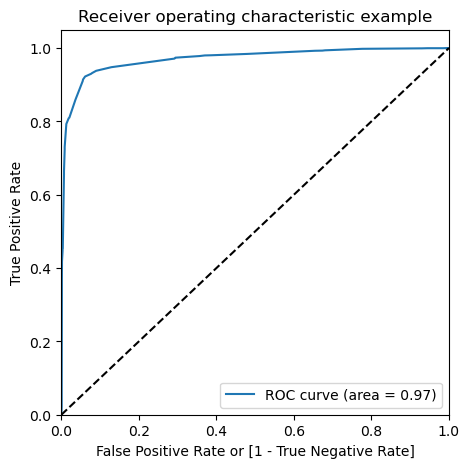

In [84]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### The Final Model-4 has Area Under Curve (AUC) value of 0.95, which is a very good indicator

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.010148,4958,0,1,0,0,0,0,0,0,0,0,0
1,0,0.821339,8957,1,1,1,1,1,1,1,1,1,1,0
2,0,0.006983,8274,0,1,0,0,0,0,0,0,0,0,0
3,1,0.116637,8909,0,1,1,0,0,0,0,0,0,0,0
4,0,0.026073,9173,0,1,0,0,0,0,0,0,0,0,0


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384980  1.000000  0.000000
0.1   0.1  0.809170  0.973717  0.706170
0.2   0.2  0.920949  0.937988  0.910283
0.3   0.3  0.932490  0.922382  0.938817
0.4   0.4  0.932648  0.914168  0.944216
0.5   0.5  0.923478  0.859138  0.963753
0.6   0.6  0.923478  0.859138  0.963753
0.7   0.7  0.914308  0.810267  0.979434
0.8   0.8  0.914783  0.808624  0.981234
0.9   0.9  0.890909  0.730185  0.991517


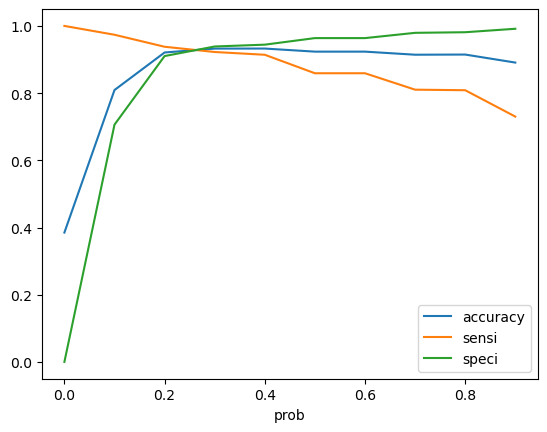

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.225 is the optimum point to take it as a cutoff probability.

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.225 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.010148,4958,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.821339,8957,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.006983,8274,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.116637,8909,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.026073,9173,0,1,0,0,0,0,0,0,0,0,0,0


In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9250592885375494

In [90]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3582,  308],
       [ 166, 2269]], dtype=int64)

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9318275154004106

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.9208226221079692

In [94]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07917737789203085


In [95]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8804811796662786


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.955709711846318


In [97]:
# ACCURACY SCORE
print("Accuracy : ",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

Accuracy :  92.51 %


## Precision and Recall

In [98]:
#Looking at the confusion matrix again

In [99]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3749,  141],
       [ 343, 2092]], dtype=int64)

#### Precision
TP / TP + FP

In [100]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9368562472010747

##### Recall
TP / TP + FN

In [101]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8591375770020534

Using sklearn utilities for the same

In [102]:
from sklearn.metrics import precision_score, recall_score

In [103]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9368562472010747

In [104]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8591375770020534

### Precision and recall tradeoff

In [105]:
from sklearn.metrics import precision_recall_curve

In [106]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6320    0
 6321    1
 6322    0
 6323    0
 6324    0
 Name: Converted, Length: 6325, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6320    0
 6321    1
 6322    0
 6323    0
 6324    0
 Name: predicted, Length: 6325, dtype: int64)

In [107]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

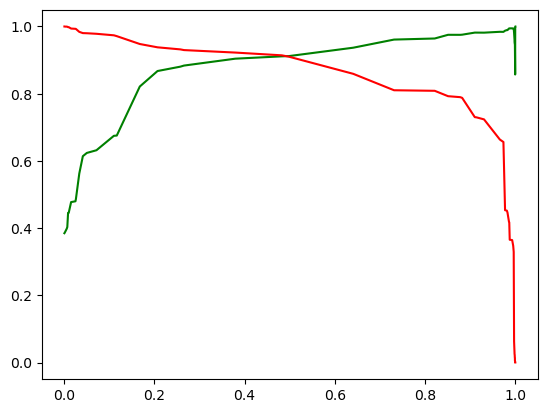

In [108]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

NOTE: The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.45 aprrox from above curve.


### Step 11: Making predictions on the test set

In [109]:
num_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [110]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,What matters most to you in choosing a course_Not_Selected,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Tentative,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
5120,0,1,0,0,0,0,0,0,1,0,0,0
3769,0,0,0,0,0,0,0,1,0,0,0,1
3557,0,1,0,1,0,0,0,0,0,0,1,0
6426,0,0,1,0,0,0,0,1,0,0,1,0
558,0,0,1,0,0,0,0,1,0,0,1,0


In [111]:
X_test_sm = sm.add_constant(X_test)

In [112]:
X_test_sm.columns

Index(['const', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_Not_Selected',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Tentative',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

Making predictions on the test set

In [113]:
y_test_pred = res.predict(X_test_sm)

In [114]:
y_test_pred[:10]

5120    0.996412
3769    0.257541
3557    0.482423
6426    0.026073
558     0.026073
4096    0.026073
4908    0.026073
1823    0.982550
8167    0.116637
2176    0.005712
dtype: float64

In [115]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [116]:
# Let's see the head
y_pred_1.head()

,0
5120,0.996412
3769,0.257541
3557,0.482423
6426,0.026073
558,0.026073


In [117]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [118]:
# Putting CustID to index
y_test_df['Lead Index'] = y_test_df.index

In [119]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [120]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [121]:
y_pred_final.head()

,Converted,Lead Index,0
0,1,5120,0.996412
1,0,3769,0.257541
2,0,3557,0.482423
3,0,6426,0.026073
4,0,558,0.026073


In [122]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [123]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Lead Index', 'Converted', 'Converted_Prob'])

In [124]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Index,Converted,Converted_Prob
0,5120,1,0.996412
1,3769,0,0.257541
2,3557,0,0.482423
3,6426,0,0.026073
4,558,0,0.026073


In [125]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [126]:
y_pred_final.head()

,Lead Index,Converted,Converted_Prob,final_predicted
0,5120,1,0.996412,1
1,3769,0,0.257541,0
2,3557,0,0.482423,1
3,6426,0,0.026073,0
4,558,0,0.026073,0


In [127]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9336283185840708

In [128]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1568,  105],
       [  75,  964]], dtype=int64)

In [129]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9278152069297402

In [131]:
# Let us calculate specificity
TN / float(TN+FP)

0.9372384937238494

### Conclusion : With the final Model-4 & ensuring alll metrics being met for Predition Accuracy, Precision & Recall which are driven by following features

**Lead Source_Welingak Website:**
   - A lead from the Welingak Website is associated with an increase in the log-odds by a coefficient of 2.76, positively impacting the likelihood of conversion.

**Last Activity_SMS Sent:**
   - A lead with the last activity being an SMS sent is associated with an increase in the log-odds by a coefficient of 2.02, positively impacting the likelihood of conversion.

**What matters most to you in choosing a course_Not_Selected:**
   - When the consideration of what matters most in choosing a course is "Not Selected," the log-odds decrease by a coefficient of -2.60, negatively impacting the likelihood of conversion.

**Tags (Busy, Closed by Horizzon, Lost to EINS, Ringing, Tentative, Will revert after reading the email, switched off):**
   - Different tag categories have varying impacts on the log-odds, influencing the likelihood of conversion positively or negatively.

**Last Notable Activity (Modified, Olark Chat Conversation):**
   - Specific last notable activities, such as "Modified" and "Olark Chat Conversation," are associated with a decrease in log-odds, impacting the likelihood of conversion.


## Logistic Regression Model for Lead Conversion

The probability expression of the model can be written as:
$$
\ln\left(\frac{p}{1-p}\right) = -3.3615 + 2.7589 \times \text{Lead Source\_Welingak Website} + 2.0180 \times \text{Last Activity\_SMS Sent} - 2.6032 \times \text{What matters most to you in choosing a course\_Not\_Selected} + 2.8690 \times \text{Tags\_Busy} + 9.2526 \times \text{Tags\_Closed by Horizzon} + 9.9182 \times \text{Tags\_Lost to EINS} - 1.2187 \times \text{Tags\_Ringing} + 3.9400 \times \text{Tags\_Tentative} + 6.9701 \times \text{Tags\_Will revert after reading the email} - 1.7979 \times \text{Tags\_switched off} - 1.5958 \times \text{Last Notable Activity\_Modified} - 1.6373 \times \text{Last Notable Activity\_Olark Chat Conversation}
$$

This equation models the log-odds of conversion as a linear combination of the predictor variables. The exponential of the log-odds gives the odds of conversion, and the probability can be calculated using the logistic function:

$$
p = \frac{1}{1 + e^{-(\ln(\text{odds})}}
$$

This logistic regression model is based on the provided coefficients and predictor variables.

